<a href="https://colab.research.google.com/github/Sarath-Haridas/Capstone_Project_2_Bike_sharing_demand_prediction/blob/main/Bike_sharing_demand_prediction__Capstone_project_2_Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##**Importing the libraries**

In [92]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Mount the drive and Import the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [372]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Supervised ML-Regression_Capstone_Project/SeoulBikeData.csv', encoding = 'unicode_escape' )

#Let's Explore and Understand about the data

In [373]:
#Checking top first 5 rows of Data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [374]:
#Checking deatils about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [375]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#**Feature Description**

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY,  type : str*,  we need to convert into datetime format.


**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that,  type : int*


**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format,  type : int, we need to convert it into category data type.*


**Temperature(°C)**: *Temperature in Celsius,  type : Float*


**Humidity(%)**: *Humidity in the air in %,  type : int*


**Wind speed (m/s)** : *Speed of the wind in m/s,  type : Float*


**Visibility (10m)**: *Visibility in m,  type : int*


**Dew point temperature(°C)**: *Temperature at the beggining of the day,  type : Float*


**Solar Radiation (MJ/m2)**: *Sun contribution,  type : Float*


**Rainfall(mm)**: *Amount of raining in mm,  type : Float*


**Snowfall (cm)**: *Amount of snowing in cm,  type : Float*


**Seasons**: *Season of the year,  type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*


**Functioning Day**: *If the day is a Functioning Day or not, type : str*

#**Preprocessing the Dataset**

**Missing values**
* **The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**

In [376]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **As we can see above there are no missing values present in the data**

In [377]:
df.min()

Date                         01/01/2018
Rented Bike Count                     0
Hour                                  0
Temperature(°C)                   -17.8
Humidity(%)                           0
Wind speed (m/s)                    0.0
Visibility (10m)                     27
Dew point temperature(°C)         -30.6
Solar Radiation (MJ/m2)             0.0
Rainfall(mm)                        0.0
Snowfall (cm)                       0.0
Seasons                          Autumn
Holiday                         Holiday
Functioning Day                      No
dtype: object

**Duplicate Value** 
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [378]:
len(df[df.duplicated()])

0

* **As we can see above there are no Duplicates values present in the data**

#**Renaming some Columns name (For Modelling purpose)**
* **Since the variables having units with name, so renaming columns for better variable analysis**

In [379]:
#Renaming some columns name
df = df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
                                    'Temperature(°C)':'Temperature',
                                    'Humidity(%)':'Humidity',
                                    'Wind speed (m/s)': 'Wind_speed',
                                    'Visibility (10m)':'Visibility',
                                    'Dew point temperature(°C)': 'Dew_point_temperature', 
                                    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                                    'Rainfall(mm)':'Rainfall',
                                    'Snowfall (cm)':'Snowfall', 
                                    'Functioning Day':'Functioning_Day'})

#**Breaking Date Column**

* **Python read "Date" column as a object type so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.**


In [380]:


df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [381]:
# Changing the "Date" column into three "year","month","day" column
df['day'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [383]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,month,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017


In [384]:
#creating a new column 'weekdays_weekends' and drop column 'date', 'day', 'year'
df['Weekend_or_weekday'] = df['day'].apply(lambda x: 1 if x == "Saturday" or x == "Sunday" else 0)

In [385]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,month,year,Weekend_or_weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


In [386]:
df['Weekend_or_weekday'].value_counts()

0    6264
1    2496
Name: Weekend_or_weekday, dtype: int64

In [387]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,month,year,Weekend_or_weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


In [388]:
#Converting 'Hour' , 'month' and "Weekend_or_weekday" to categorical values
columns = ['Hour','month', 'Weekend_or_weekday']
for i in columns:
  df[columns] = df[columns].astype('category')

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [390]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,day,month,year,Weekend_or_weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


As we can see following above in the data

We convert the "date" column into 3 different column i.e "year","month","day".

The "year" column in our data set is basically contain the 2 unique years contains the details of from 2017 december to 2018 november so if we consider this is a one year then we don't need the "year" column so we decided to drop it.



In [391]:
df.drop(columns= ['year', 'Date'], inplace = True)

##**Exploratory Data Analysis on Data set**

*Creating a barplot to check the values of rented bike count against various features* 

Text(0.5, 1.0, 'Month vs Bike count')

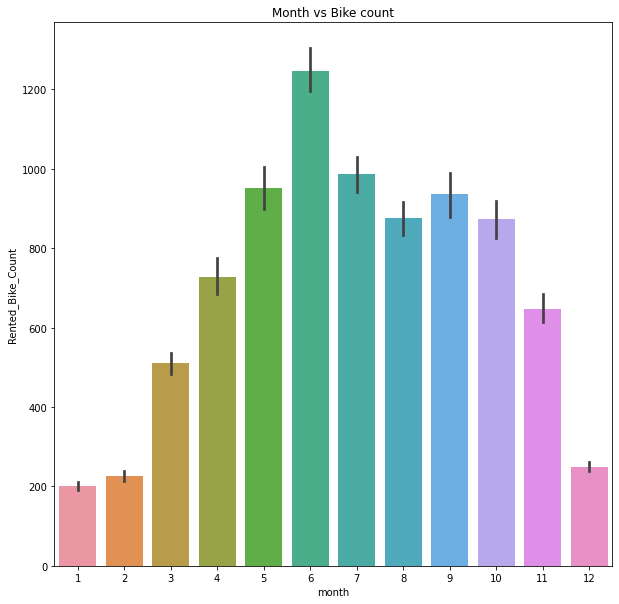

In [392]:
#Rented bike count vs Month
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='month',y='Rented_Bike_Count')

plt.title("Month vs Bike count")

##**Observation**
* **From the above bar and point plot we can clearly say that from the month 5th to 10th the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

In [393]:
'''
#Rented bike count vs Days
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='day',y='Rented_Bike_Count')
plt.title("Days vs Bike count")
'''

'\n#Rented bike count vs Days\nplt.figure(figsize=(10,10))\nsns.barplot(data=df,x=\'day\',y=\'Rented_Bike_Count\')\nplt.title("Days vs Bike count")\n'

##Observation
* Highest number of bikes are rented on Fridays and least number of bikes are rented on Sundays.

Text(0.5, 1.0, 'Weekends/Weekdays vs Bike count')

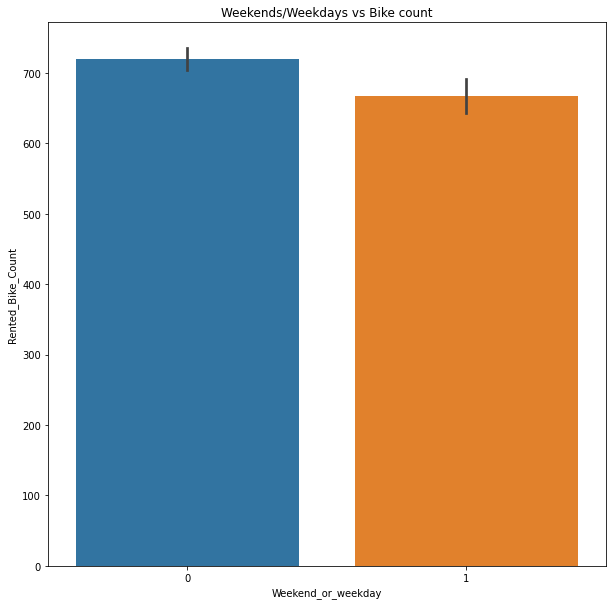

In [394]:
#Weekends/Weekdays vs Bike count
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Weekend_or_weekday',y='Rented_Bike_Count')
plt.title("Weekends/Weekdays vs Bike count")

Text(0.5, 1.0, 'Weekends/Weekdays vs Bike count')

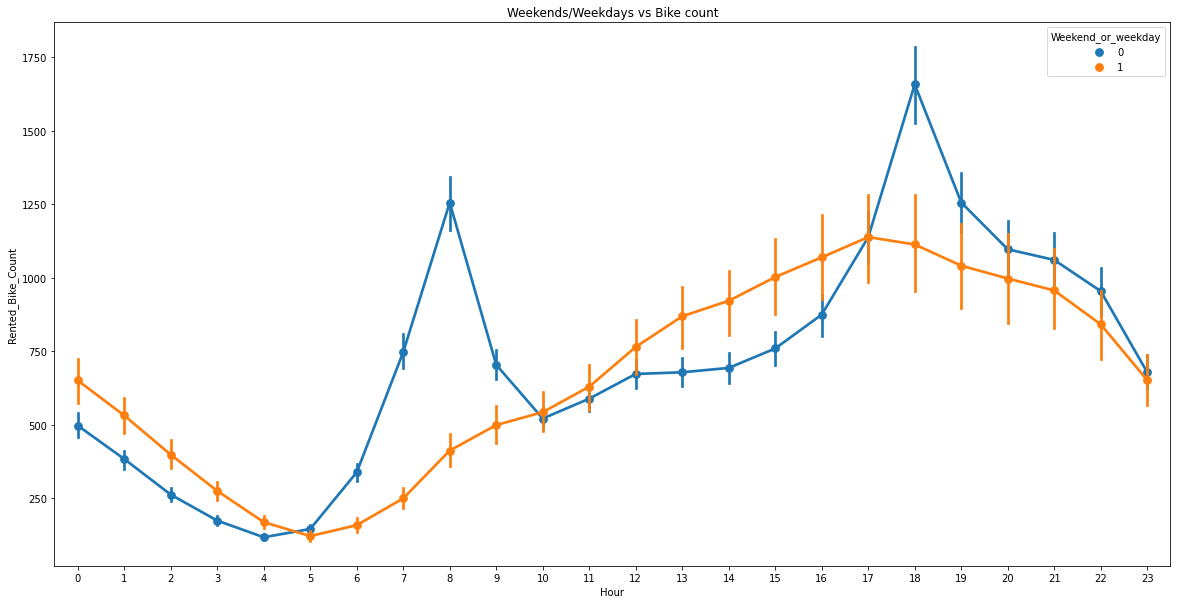

In [395]:
#Weekends/Weekdays vs Bike count
plt.figure(figsize=(20,10))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count', hue = 'Weekend_or_weekday')
plt.title("Weekends/Weekdays vs Bike count")

Text(0.5, 1.0, 'Functioning day vs Bike count')

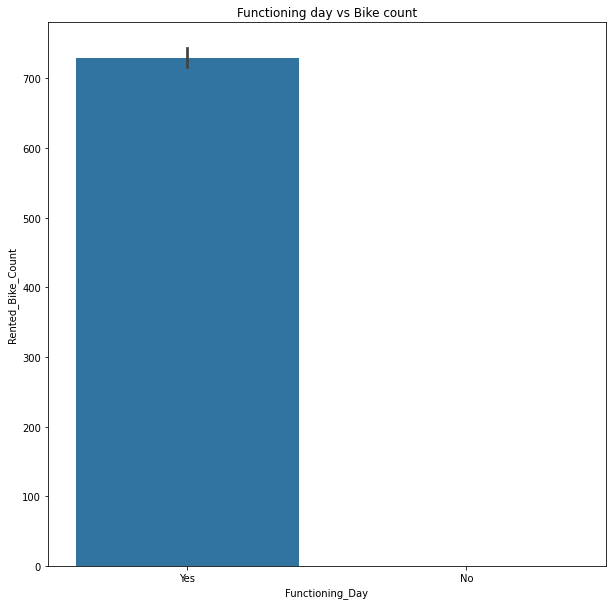

In [396]:
#Functioning day vs Bike count
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count')
plt.title("Functioning day vs Bike count")

Text(0.5, 1.0, 'Hours vs Bike count')

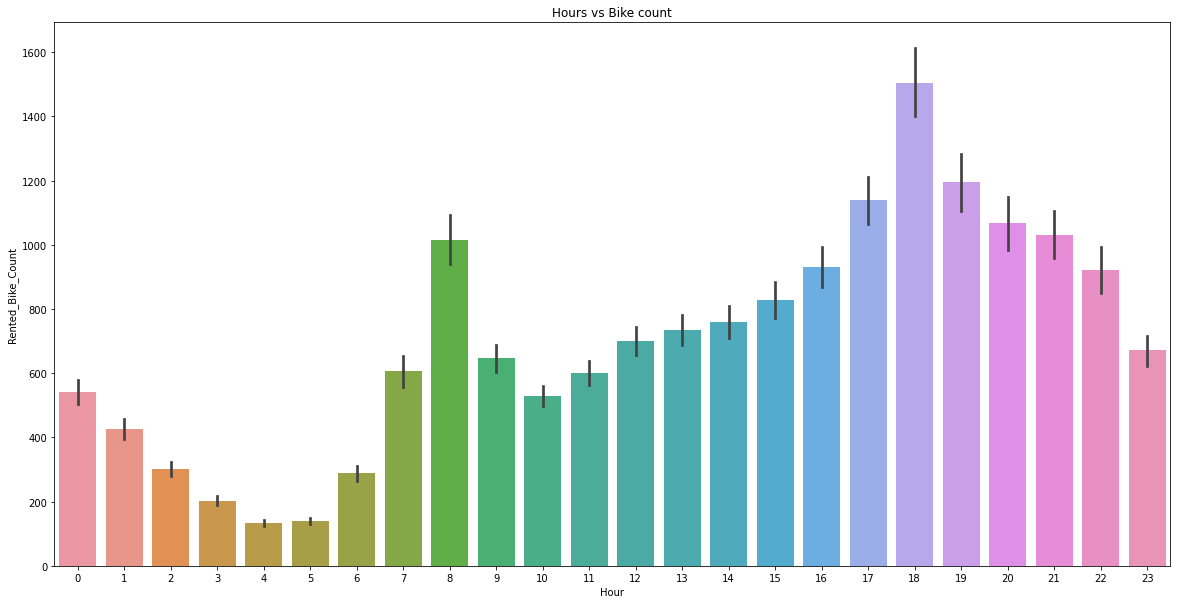

In [397]:
#Rented bike count vs Hour
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count')
plt.title("Hours vs Bike count")

##**Observation**
* **In the above plot which shows the use of rented bike according the hours.**

* **Generally people use rented bikes during their working hours from 7am to 9am and 5pm to 7pm.(Office and college going time could be the reason for this sudden peak)**

* **But on Holidays the case is different (Less Bike rentals happened).**
* **Again there is peak between 10 AM to 7 PM. may be its office or college leaving time for the above people.(Except Holiday).**   

Text(0.5, 1.0, 'Seasons vs Bike count')

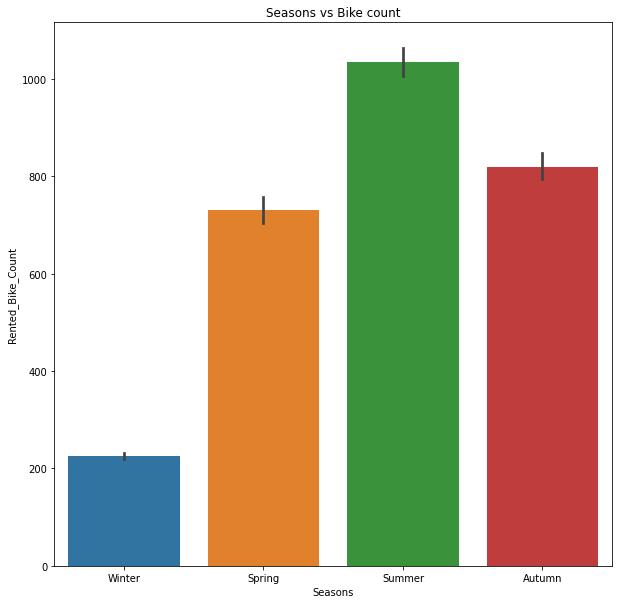

In [398]:
#Seasons vs Bike count
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count')
plt.title("Seasons vs Bike count")

##Observation
* Most number of bikes are rented in Summer.

#**Let's check the Distribution of all the Variables**

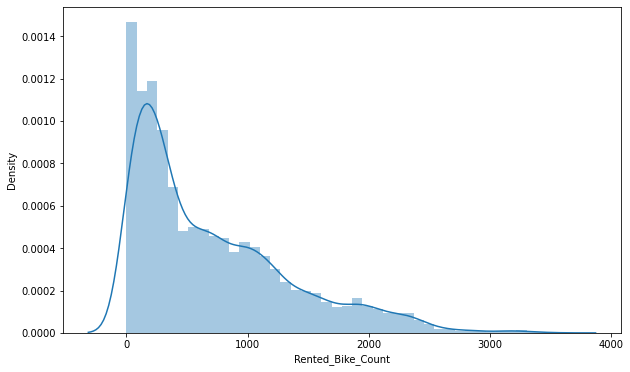

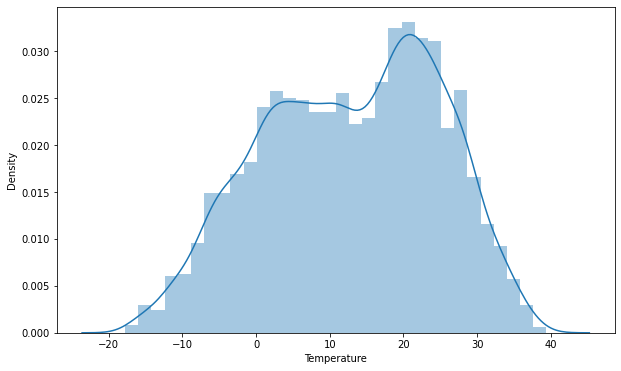

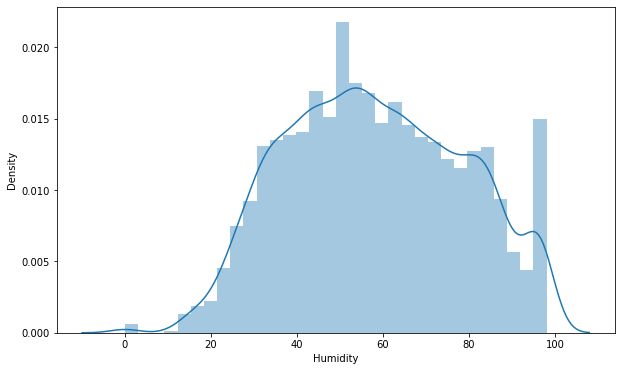

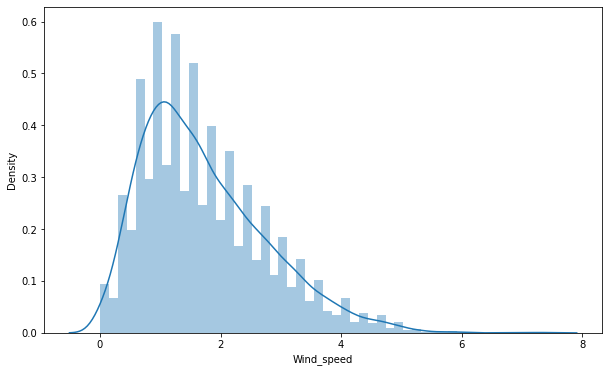

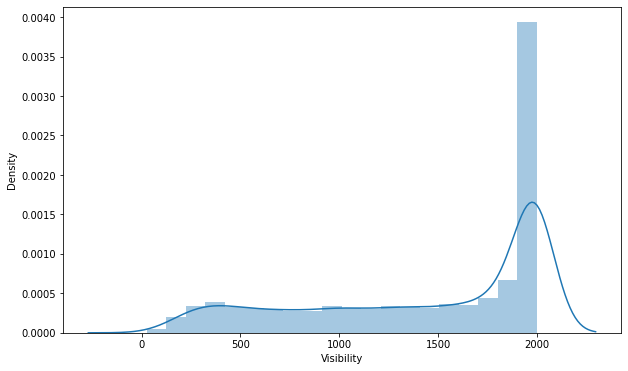

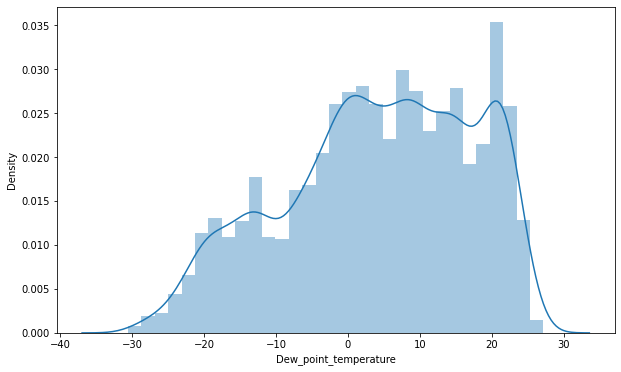

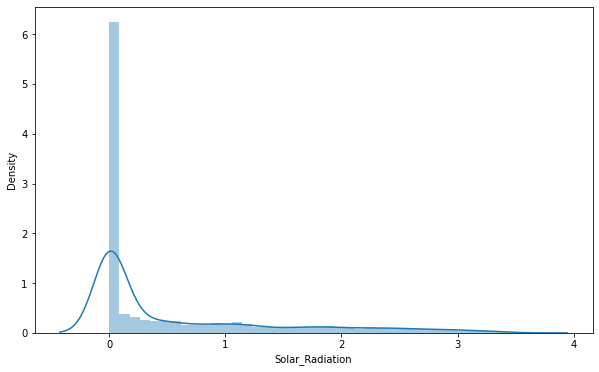

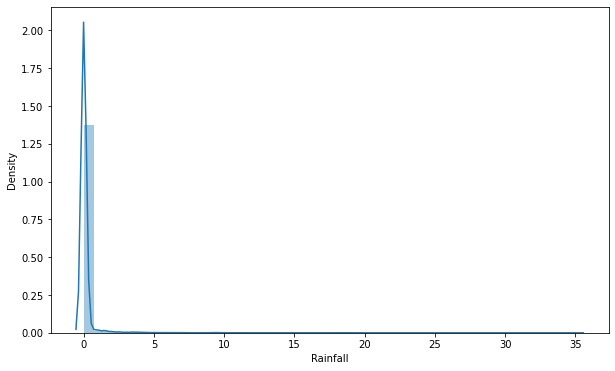

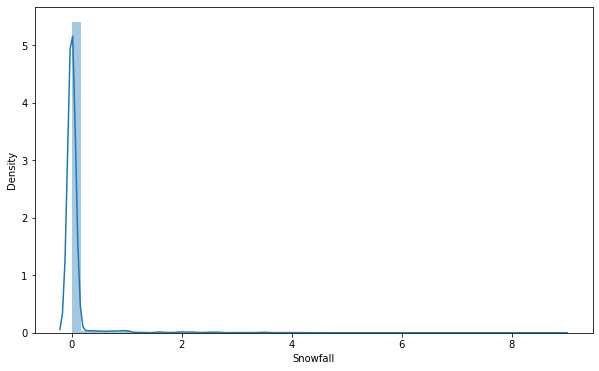

In [399]:
#Checking the distribution of various values in the data set
columns = df.describe().columns
for col in columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])

In [400]:
#Storing the numeric variables 
numeric_features = df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

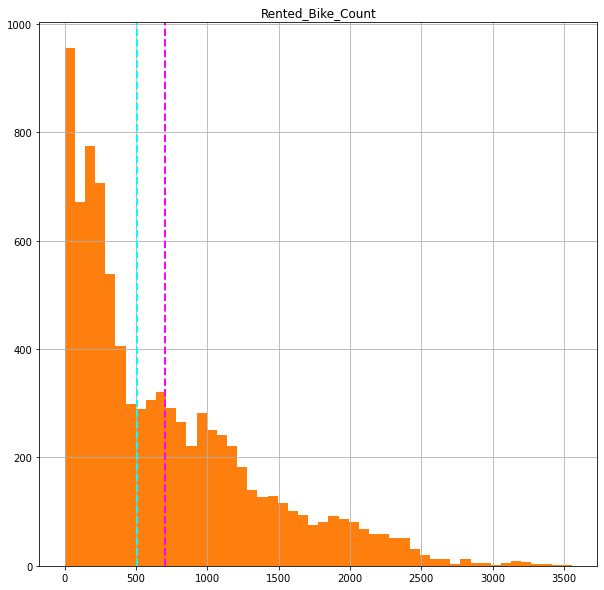

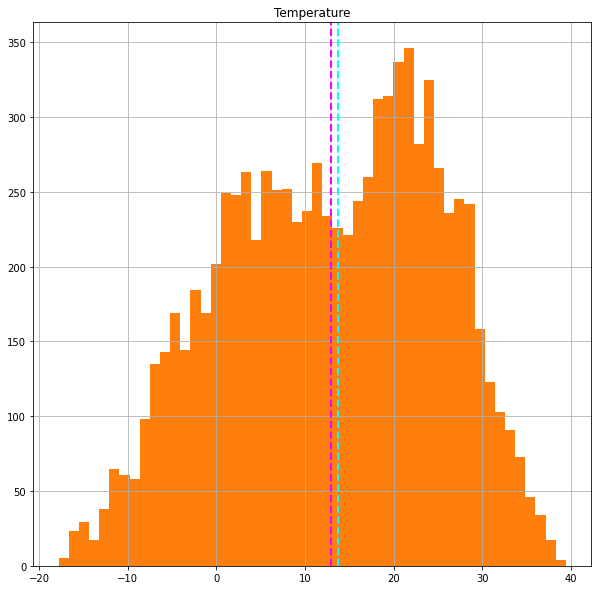

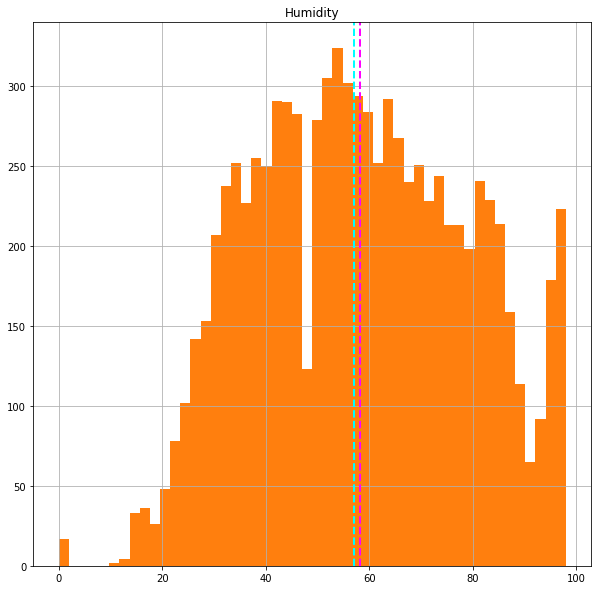

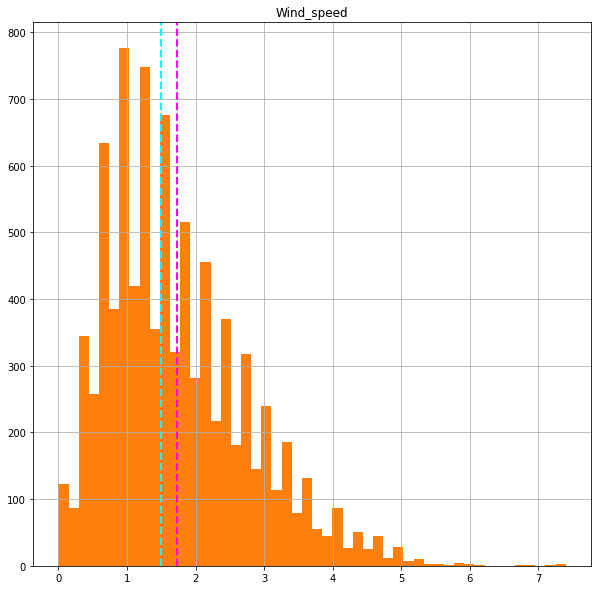

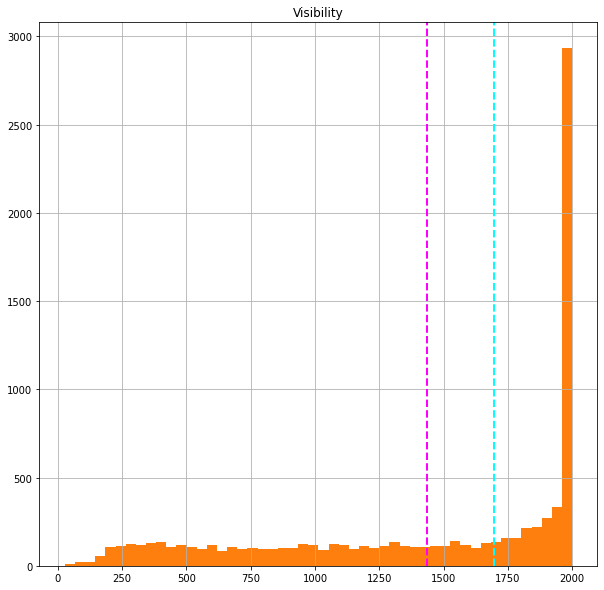

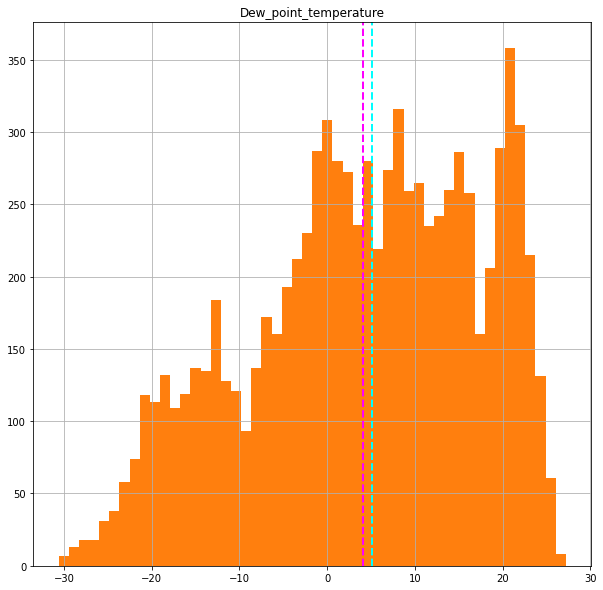

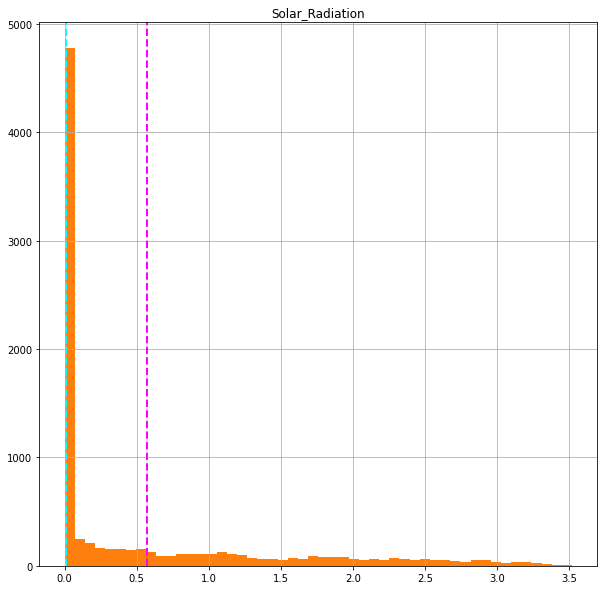

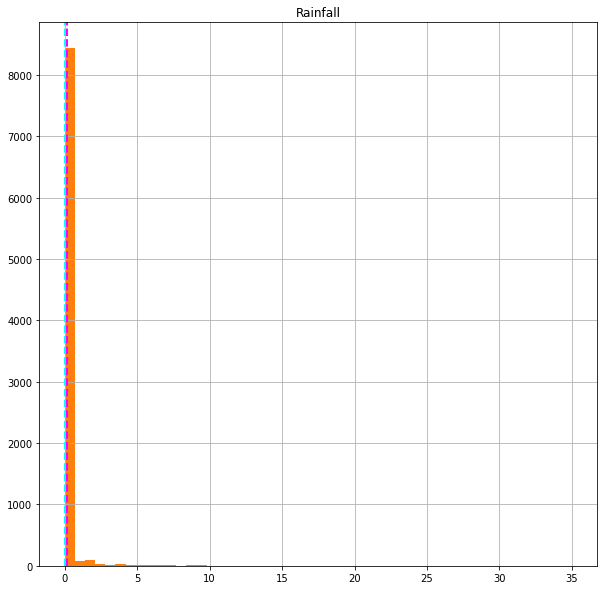

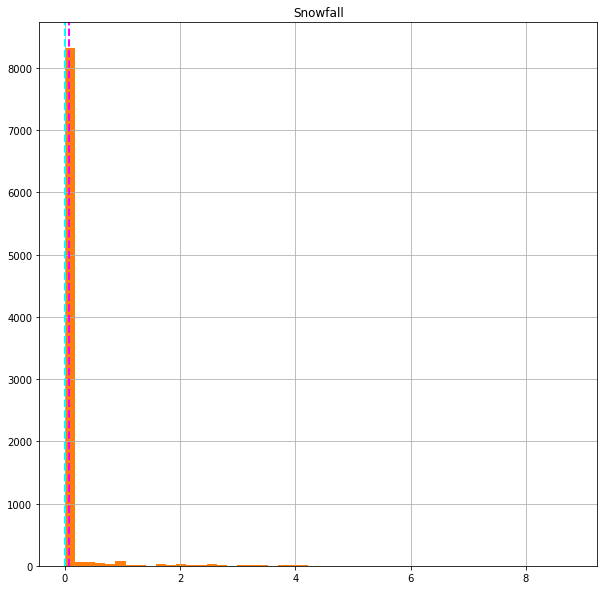

In [401]:
#Checking the distribution of numerical variable along with their mean and median
for i in numeric_features:
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  feature = df[i]
  feature.hist(bins=50, ax = ax)
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

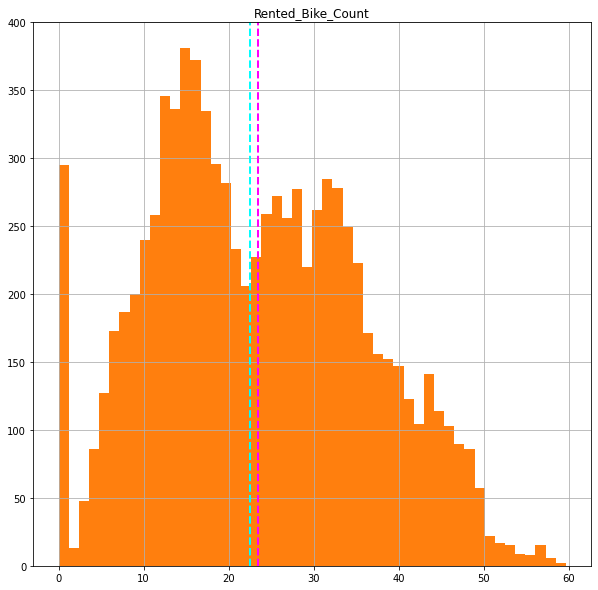

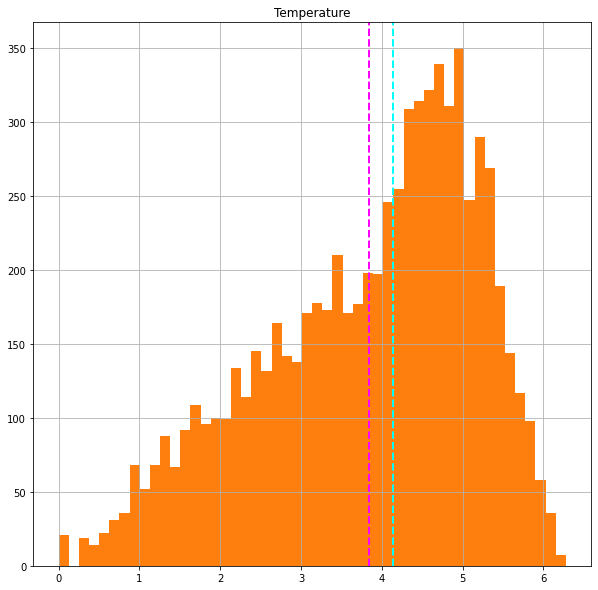

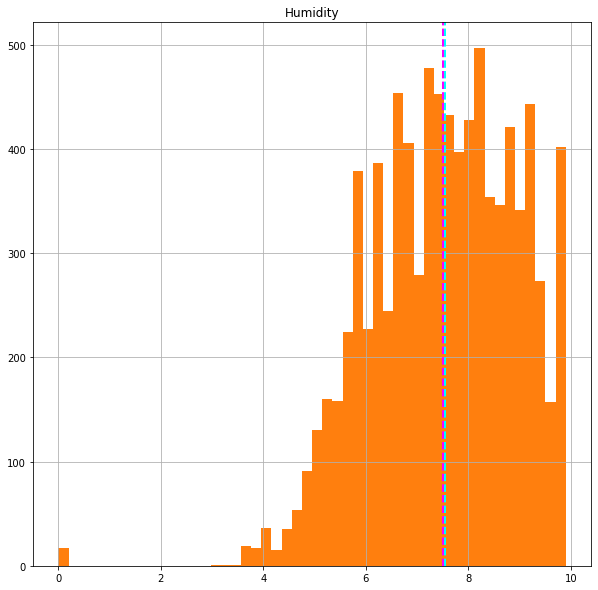

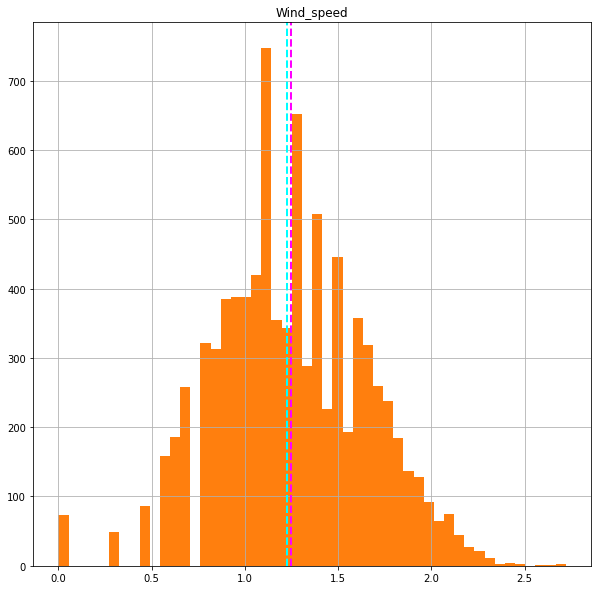

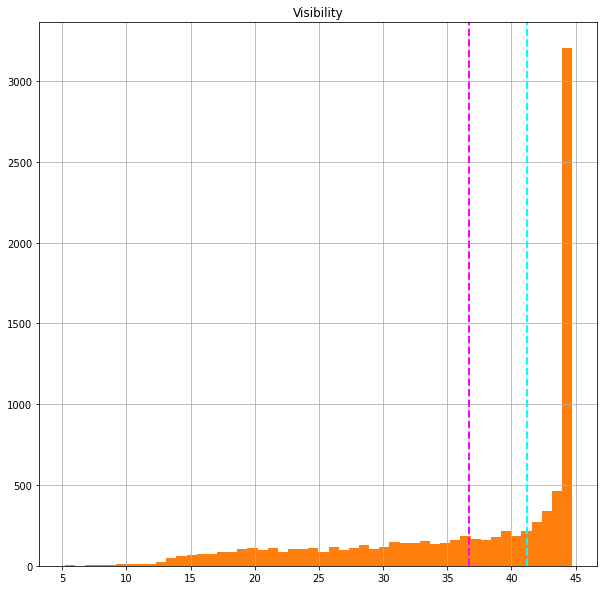

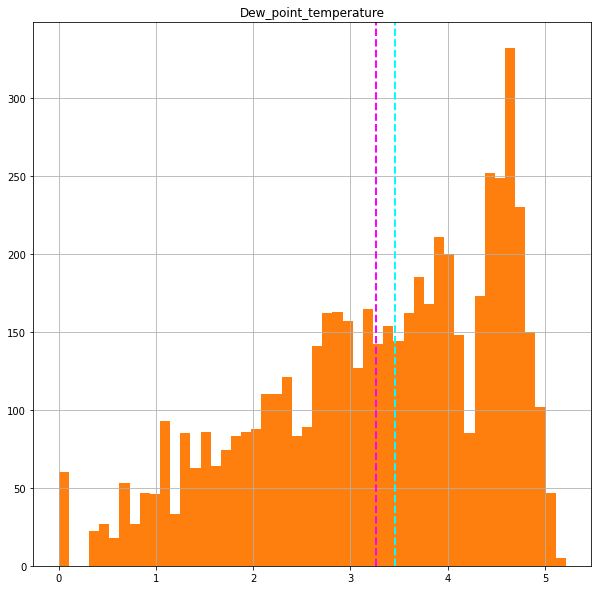

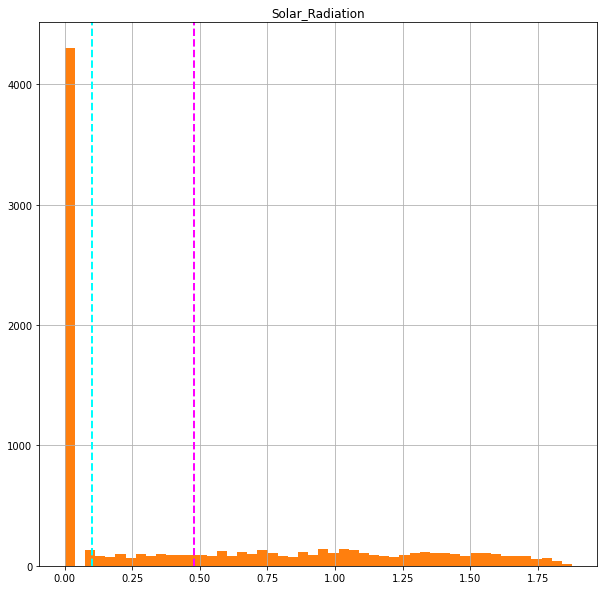

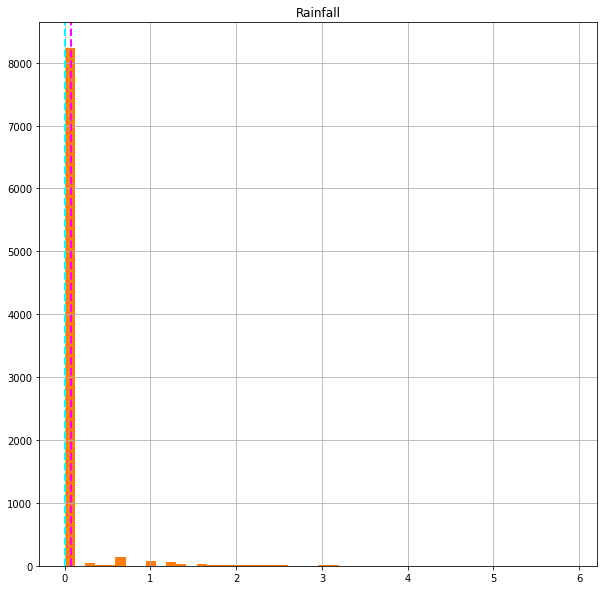

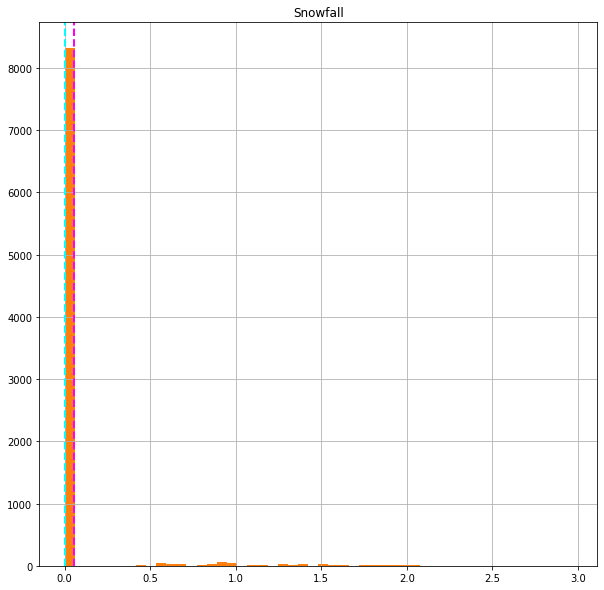

In [402]:
#Checking the distribution of the square root values
for i in numeric_features:
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  feature = np.sqrt(df[i])
  feature.hist(bins=50, ax = ax)
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

* We can see that most of the features are not showing a normal distribution

#**Regresion Plot**

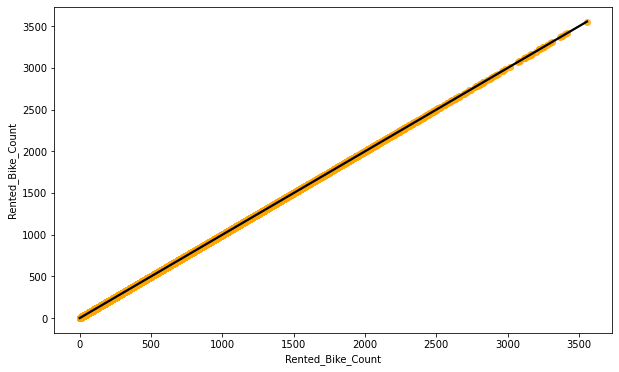

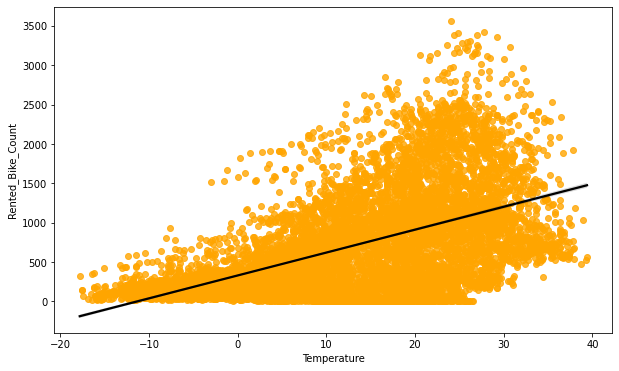

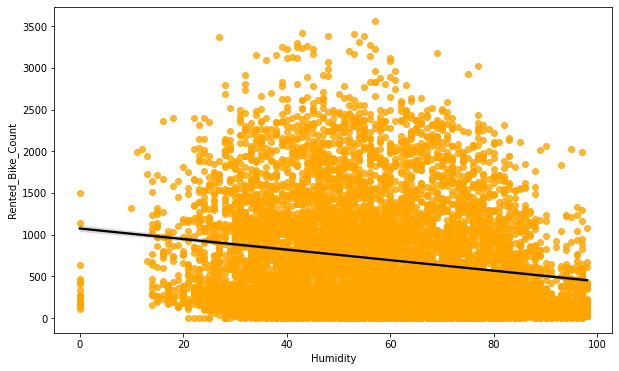

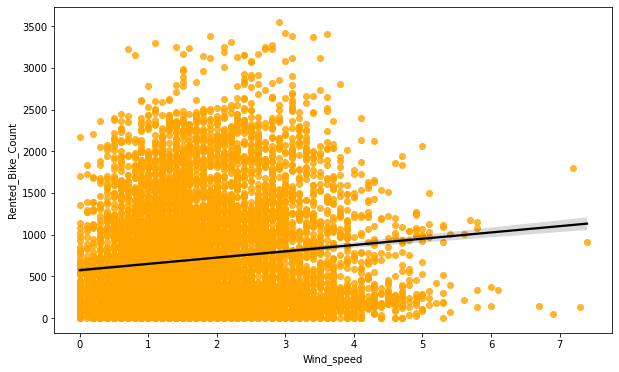

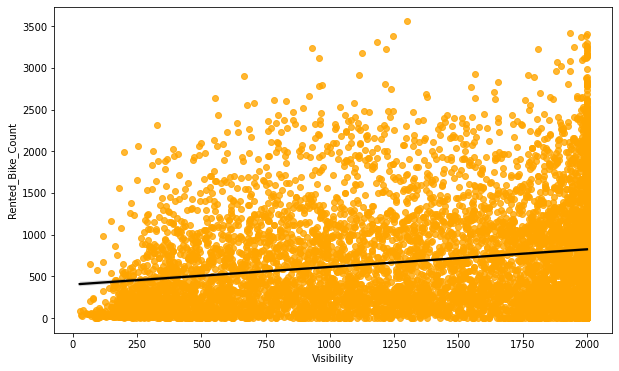

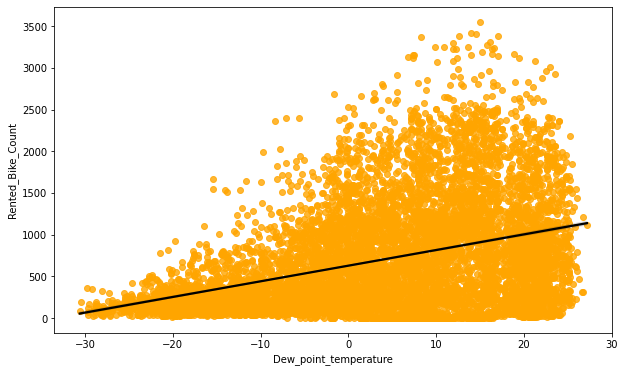

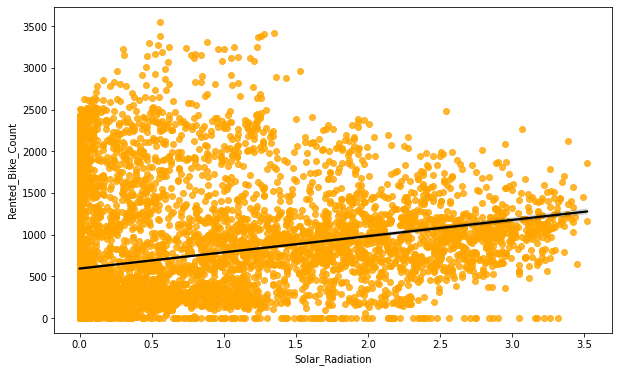

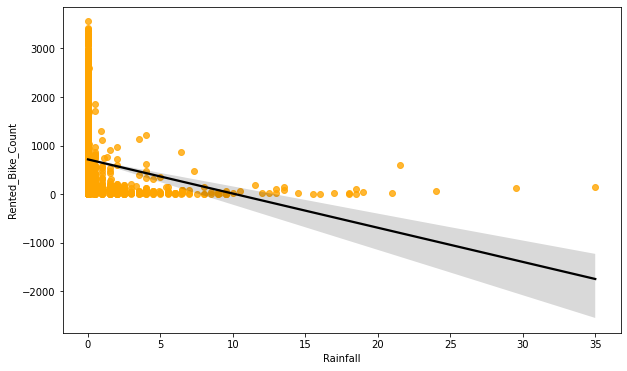

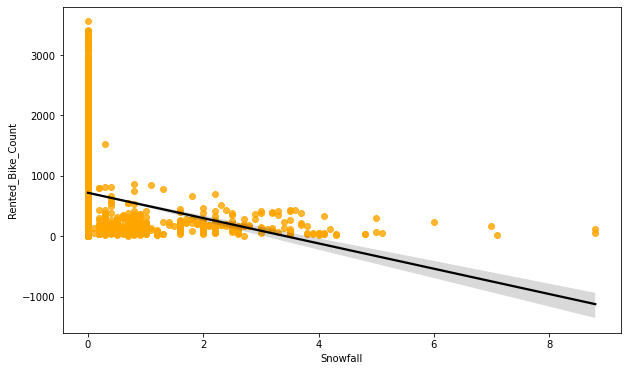

In [403]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* *From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.*


* *which means the rented bike count increases with increase of these features.*
* *'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase.*

#**Let's check the Relationship Between the Target and Independent variable**

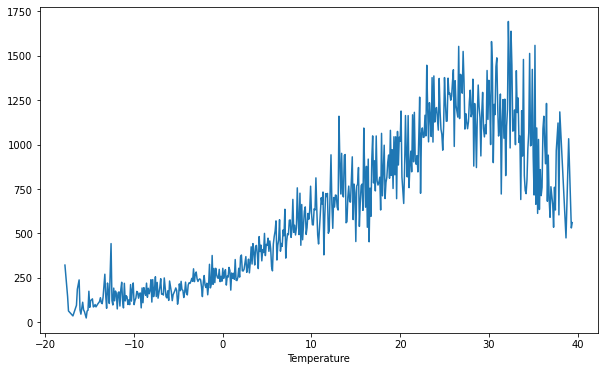

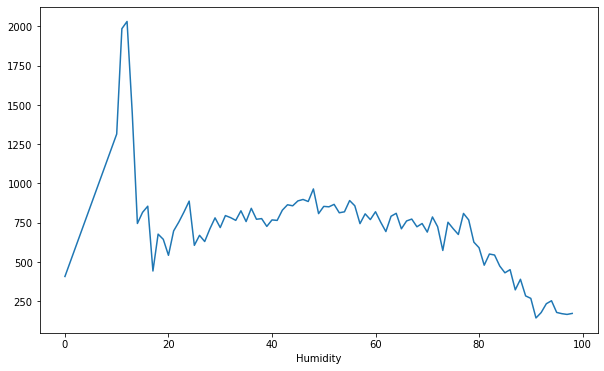

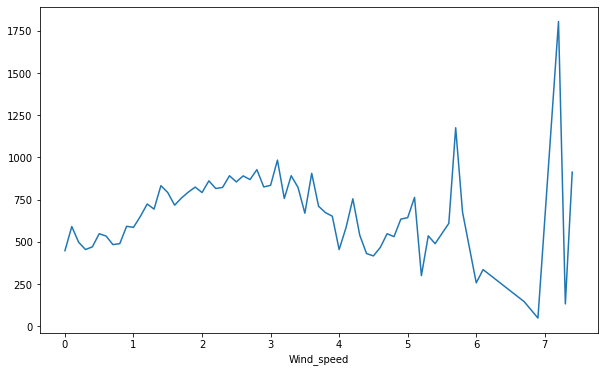

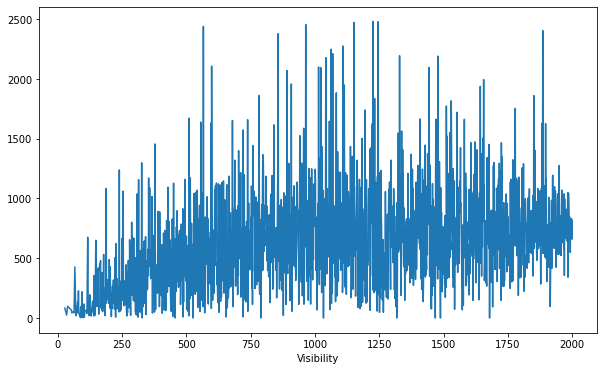

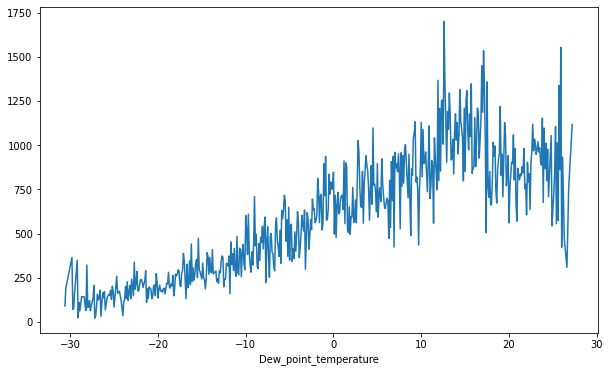

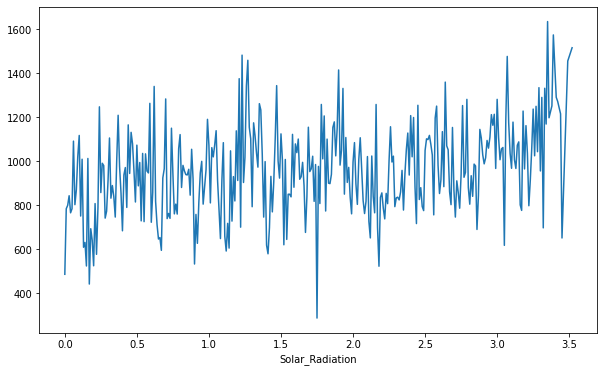

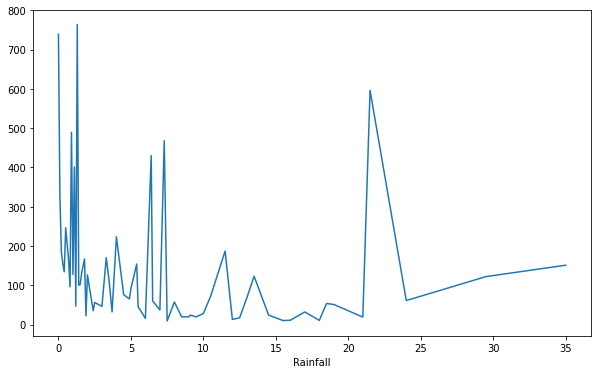

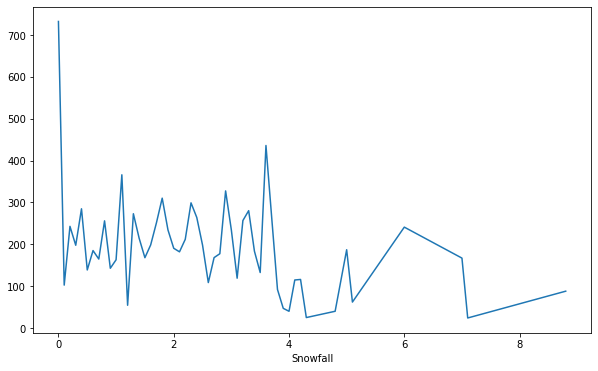

In [404]:
for col in numeric_features[1:]:
  plt.figure(figsize=(10,6))
  df.groupby(col).mean()['Rented_Bike_Count'].plot()
  



#**Normalise Rented_Bike_Count data column (Dependent Variable)**

* **The data normalization is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data**

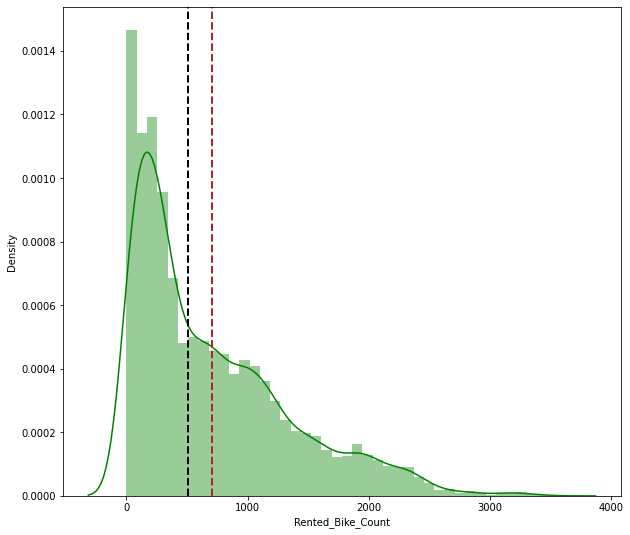

In [405]:
#Distribution plot for Rented_Bike_Count
plt.figure(figsize=(10,9))
ax = sns.distplot(df['Rented_Bike_Count'], color ='green')
ax.axvline(df['Rented_Bike_Count'].mean(), color = 'brown', linestyle = 'dashed', linewidth = 2)
ax.axvline(df['Rented_Bike_Count'].median(), color = 'black', linestyle = 'dashed', linewidth = 2)

**The graph above demonstrates the moderate right skewness of the rented bike count. Since the dependent variable's distribution must be normal in order for linear regression to work, we must take some action to make it such.**

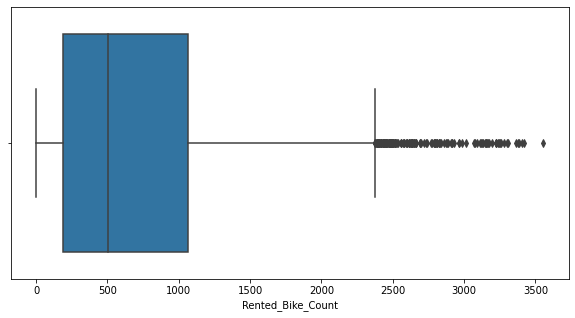

In [406]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,5))
sns.boxplot(df['Rented_Bike_Count'])

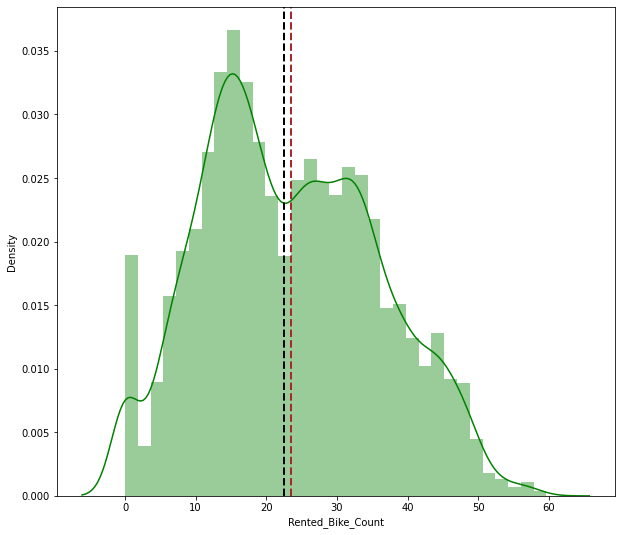

In [407]:
#Normalising the right skeweness of Dependent variable
plt.figure(figsize=(10,9))
ax = sns.distplot(np.sqrt(df['Rented_Bike_Count']), color ='green')
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color = 'brown', linestyle = 'dashed', linewidth = 2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color = 'black', linestyle = 'dashed', linewidth = 2)
plt.show()

**For the skewed variable, we have a general rule that applies the square root to make it normal. Here, we almost get a normal distribution after applying square root to the skewed rented bike count.**

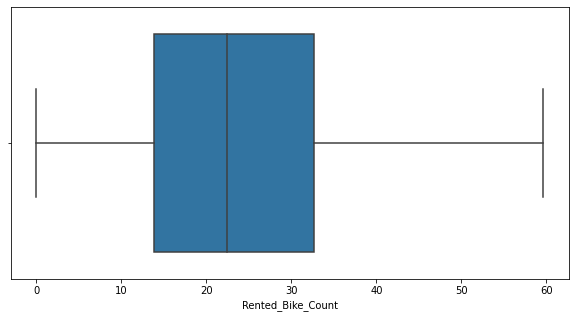

In [408]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,5))
sns.boxplot(np.sqrt(df['Rented_Bike_Count']))
plt.show()

* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**

#**Checking Corelation between variables**

In [409]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


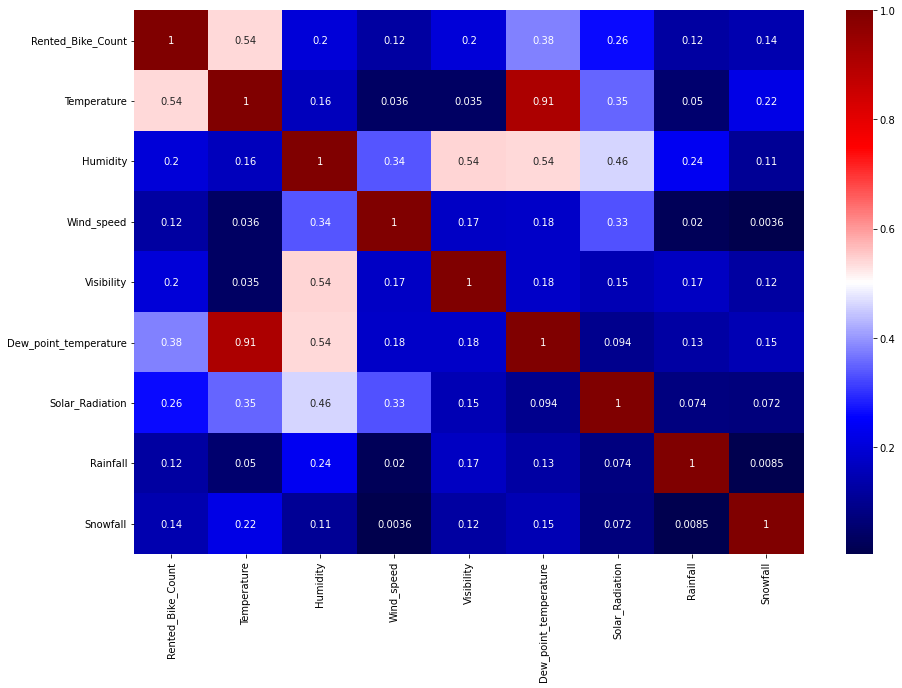

In [410]:
#Plotting the heatmap
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'seismic')

 * **Temperature and Dew point Temperature are highly correlated.**

* **As per our regression assumption, there should not be colinearity between independent variables.**
* **We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them. As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column we'll futher confirm this with VIF.**

## **Checking the Variance Inflation Factor**

* **A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.**

In [411]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [412]:
#CHecking the VIF values
df_n = pd.DataFrame()
for i in numeric_features[1:]:
  df_n[i] = df[i].values
calc_vif(df_n)


,variables,VIF
0,Temperature,29.075866
1,Humidity,5.069743
2,Wind_speed,4.517664
3,Visibility,9.051931
4,Dew_point_temperature,15.201989
5,Solar_Radiation,2.821604
6,Rainfall,1.079919
7,Snowfall,1.118903


* **We can see that Temperature and Dew_point_temperature have high vlue of VIF. We can drop one of them. From correlation heatmap we know that there is a high correlation between Temperature and Rented bike count, we'll keep Temperature and drop De poit temperature.**

In [413]:
#Droping columns from both data frames
df = df.drop(['Dew_point_temperature'], axis =1)
df_n = df_n.drop(['Dew_point_temperature'], axis = 1)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Rented_Bike_Count   8760 non-null   int64   
 1   Hour                8760 non-null   category
 2   Temperature         8760 non-null   float64 
 3   Humidity            8760 non-null   int64   
 4   Wind_speed          8760 non-null   float64 
 5   Visibility          8760 non-null   int64   
 6   Solar_Radiation     8760 non-null   float64 
 7   Rainfall            8760 non-null   float64 
 8   Snowfall            8760 non-null   float64 
 9   Seasons             8760 non-null   object  
 10  Holiday             8760 non-null   object  
 11  Functioning_Day     8760 non-null   object  
 12  day                 8760 non-null   object  
 13  month               8760 non-null   category
 14  Weekend_or_weekday  8760 non-null   category
dtypes: category(3), float64(5), int64(3), 

In [415]:
#renwed VIF 
calc_vif(df_n)
#df_n

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind_speed,4.079926
3,Visibility,4.409448
4,Solar_Radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901


#**Creating Dummy Variable for Model Training** (Encoding)

**Many machine learning algorithms are unable to directly operate on categorical data. The categories must be transformed into numerical data types or into numbers. Both input and output variables need to have this.**

In [416]:
#Creating a copy
df_copy = df.copy()

In [417]:
#Obtaining the categorical features
cat_features = df.select_dtypes(['object','category']).columns
cat_features = list(cat_features)
cat_features 

['Hour',
 'Seasons',
 'Holiday',
 'Functioning_Day',
 'day',
 'month',
 'Weekend_or_weekday']

#**One Hot Encoding**

**Categorical data cannot be directly used by many machine learning techniques. It is necessary to convert the categories into numerical data types or integers. Both input and output variables must meet this requirement.**

In [418]:
#Executing ONe hot encoding
df_copy = pd.get_dummies(df_copy, columns = cat_features, drop_first = True)



In [419]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rented_Bike_Count     8760 non-null   int64  
 1   Temperature           8760 non-null   float64
 2   Humidity              8760 non-null   int64  
 3   Wind_speed            8760 non-null   float64
 4   Visibility            8760 non-null   int64  
 5   Solar_Radiation       8760 non-null   float64
 6   Rainfall              8760 non-null   float64
 7   Snowfall              8760 non-null   float64
 8   Hour_1                8760 non-null   uint8  
 9   Hour_2                8760 non-null   uint8  
 10  Hour_3                8760 non-null   uint8  
 11  Hour_4                8760 non-null   uint8  
 12  Hour_5                8760 non-null   uint8  
 13  Hour_6                8760 non-null   uint8  
 14  Hour_7                8760 non-null   uint8  
 15  Hour_8               

In [420]:
df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_or_weekday_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0



#**Model Training**


#**Train Test Split For Regression**

**As a general guideline, divide the dataset into a training and test set before fitting any model. This means that a piece of the data will be used to train the model and a portion will be used to assess how well our model performs on data that has not yet been seen. Using the Scikit Learn toolkit, we will divide our data into training and testing sets in this stage.**

In [421]:
#Assigning values to X and Y.
X = df_copy.drop(columns = ["Rented_Bike_Count"], axis = 1)
y = np.sqrt(df_copy["Rented_Bike_Count"])

In [422]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           8760 non-null   float64
 1   Humidity              8760 non-null   int64  
 2   Wind_speed            8760 non-null   float64
 3   Visibility            8760 non-null   int64  
 4   Solar_Radiation       8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Hour_1                8760 non-null   uint8  
 8   Hour_2                8760 non-null   uint8  
 9   Hour_3                8760 non-null   uint8  
 10  Hour_4                8760 non-null   uint8  
 11  Hour_5                8760 non-null   uint8  
 12  Hour_6                8760 non-null   uint8  
 13  Hour_7                8760 non-null   uint8  
 14  Hour_8                8760 non-null   uint8  
 15  Hour_9               

In [423]:
y.head()


0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [424]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_or_weekday_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [425]:
#**Spliting the Dataset into Train and Test data**
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 53)
(2190, 53)


##**Linear Regression**

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.


Let us now implement our first model.
We will be using LinearRegression from scikit library.

In [426]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [427]:
#Let's check the score
reg.score(X_train,y_train)

0.7741888289786046

In [428]:
#Checking coefficients
reg.coef_

array([ 5.15285419e-01, -1.26172407e-01, -5.12466167e-02,  1.00183108e-03,
        8.51601284e-01, -1.47803667e+00, -9.90525142e-02, -2.07375129e+00,
       -4.98350967e+00, -7.23996664e+00, -9.52015485e+00, -9.07025107e+00,
       -4.06822516e+00,  2.22628425e+00,  7.56578579e+00,  1.26789672e+00,
       -3.22860442e+00, -3.43624985e+00, -2.68603181e+00, -2.89431602e+00,
       -3.09667978e+00, -1.82660504e+00,  1.35317884e-01,  3.83527002e+00,
        1.02627228e+01,  6.78196170e+00,  6.08456044e+00,  6.21301362e+00,
        5.00348299e+00,  1.44259997e+00, -4.88258336e-01, -1.31367212e+00,
       -4.73682207e+00,  3.37065154e+00,  2.84844671e+01, -1.25515980e+00,
        1.55433281e-01, -1.45396565e+00, -5.73142096e-01, -3.59171187e-01,
       -3.62144725e-01, -8.40237927e-01, -1.56641642e+00, -6.23906857e-01,
        1.70206494e+00,  4.37941192e+00, -1.67682176e+00, -4.01626228e+00,
        5.95396568e-01,  3.30214301e+00,  2.64121295e+00,  2.01817595e+00,
       -1.29853237e+00])

In [429]:
#Get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [430]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 34.772815505938794
RMSE : 5.896847929694202
MAE : 4.44628005998351
R2 : 0.7741888289786046
Adjusted R2 : 0.7685858364392161


**Our r2 score value is approximately 0.77 that means our model is able to capture most of the data variance.**

In [431]:
# storing the test set metrics value in a dataframe for later comparison
train_dict={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted_R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(train_dict,index=[1])

In [432]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_test)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 33.01808528053411
RMSE : 5.746136552548513
MAE : 4.3848165494388995
R2 : 0.7909803313783529
Adjusted R2 : 0.7857939819228532


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data.**

In [433]:
test_dict={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted_R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(test_dict,index=[1])

Text(0.5, 1.0, 'Actual v/s Predicted')

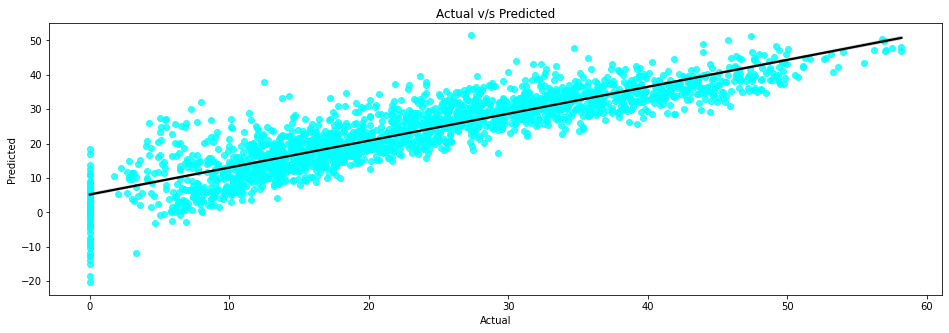

In [434]:
#Plotting  the figure
'''Plotting for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test,scatter_kws={'color' : 'cyan'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

##**Lasso Regression**

In [435]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7902749859191127 0.7733282169149762


In [436]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [437]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 34.905341741799376
RMSE : 5.908074283706949
MAE : 4.456470682617084
R2 : 0.7733282169149762
Adjusted R2 : 0.7677038702373048


**Our r2 score value is 0.77 , which is almost similar to regression score. Lets save it in a dataframe for later comparisons.**

In [438]:
# storing the test set metrics value in a dataframe for later comparison
train_dict={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted_R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(train_dict,ignore_index=True)

In [439]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )

MSE : 33.12950616584603
RMSE : 5.755823673971088
MAE : 4.400390197898862
R2 : 0.7902749859191127
Adjusted R2 : 0.7850711349142967


In [440]:
# storing the test set metrics value in a dataframe for later comparison
test_dict={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted_R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(test_dict,ignore_index=True)

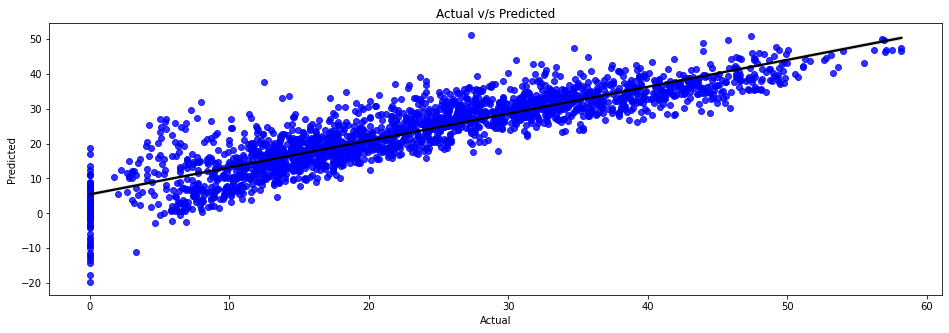

In [441]:
#Plot the figure
def plot_scatter(y_pred_test_lasso,y_test):
  '''Plotting for y_pred_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred_test_lasso,scatter_kws={'color':'blue'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")
plot_scatter(y_pred_test_lasso,y_test)

#**Ridge Regression**

In [442]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=1)

In [443]:
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [444]:
ridge.score(X_train,y_train)

0.7741812046087132

In [445]:
ridge.score(X_test,y_test)

0.7908879056865087

In [446]:
#Get the X_train and X-test value
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [447]:
#Calculate Mean Square Error
MSE_for_ridge =  mean_squared_error(y_train, y_pred_train_ridge)
print('Mean_Squared_Error_for_Ridge_Regression : ',MSE_for_ridge)

#Calculate Mean Absolute error
MAE_for_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
print('Mean_Absolute_Error_for_Ridge_Regression :' , MAE_for_ridge)

#Calculate Root Mean Square Error
RMSE_for_ridge = np.sqrt(MSE_for_ridge)
print('Root_Mean_Square_Error_For_Ridge_Regression :', RMSE_for_ridge)

#Calculate r2 Score
r2_score_for_ridge = r2_score(y_train, y_pred_train_ridge)
print('r2_score_for_ridge :', r2_score_for_ridge)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_ridge = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_ridge :", Adjusted_r2_score_for_ridge )

Mean_Squared_Error_for_Ridge_Regression :  34.77398958783379
Mean_Absolute_Error_for_Ridge_Regression : 4.447056283293633
Root_Mean_Square_Error_For_Ridge_Regression : 5.896947480504959
r2_score_for_ridge : 0.7741812046087132
Adjusted_r2_score_for_ridge : 0.768578022887862


**Our r2 score value is 0.77 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [448]:
train_dict = {'Model' : 'Ridge regression',
              'MAE' : round((MAE_for_ridge),3),
              'MSE' : round((MSE_for_ridge),3),
              'RMSE' : round((RMSE_for_ridge),3),
              'R2_score' : round((r2_score_for_ridge),3),
              'Adjusted_R2' : round((Adjusted_r2_score_for_ridge),2)
             }
training_df = training_df.append(train_dict,ignore_index=True)

In [449]:
#Calculate Mean Square Error
MSE_for_ridge =  mean_squared_error(y_test, y_pred_test_ridge)
print('Mean_Squared_Error_for_Ridge_Regression : ',MSE_for_ridge)

#Calculate Mean Absolute error
MAE_for_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
print('Mean_Absolute_Error_for_Ridge_Regression :' , MAE_for_ridge)

#Calculate Root Mean Square Error
RMSE_for_ridge = np.sqrt(MSE_for_ridge)
print('Root_Mean_Square_Error_For_Ridge_Regression :', RMSE_for_ridge)

#Calculate r2 Score
r2_score_for_ridge = r2_score(y_test, y_pred_test_ridge)
print('r2_score_for_ridge :', r2_score_for_ridge)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_ridge = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_ridge :", Adjusted_r2_score_for_ridge )

Mean_Squared_Error_for_Ridge_Regression :  33.03268543465141
Mean_Absolute_Error_for_Ridge_Regression : 4.387288552083024
Root_Mean_Square_Error_For_Ridge_Regression : 5.747406844364805
r2_score_for_ridge : 0.7908879056865087
Adjusted_r2_score_for_ridge : 0.785699262896895


**Our r2 score value is 0.78 that means our model is able to capture most of 
the data variance. Lets save it in a dataframe for later comparisons.**

In [450]:
#Storing the traning set metrics value in a dataframe for later comparison
test_dict = {'Model' : 'Ridge regression',
         'MAE' : round((MAE_for_ridge),3),
         'MSE' : round((MSE_for_ridge),3),
         'RMSE' : round((RMSE_for_ridge),3),
         'R2_score' : round((r2_score_for_ridge),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_ridge),2)
         }
test_df = test_df.append(test_dict,ignore_index=True)

Text(0.5, 1.0, 'Actual v/s Predicted')

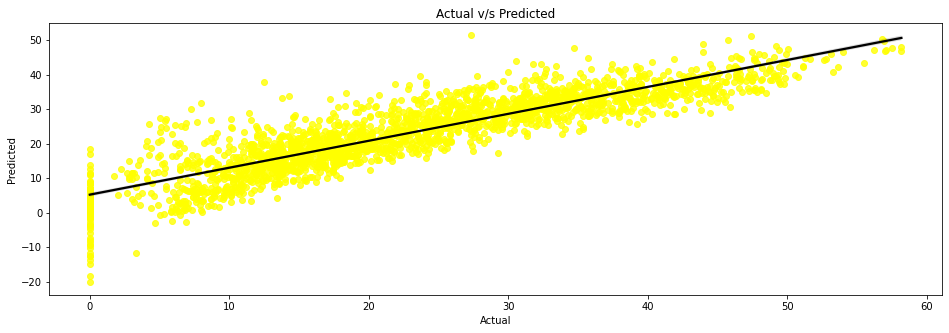

In [451]:
'''Plotting for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_ridge,scatter_kws={'color':'yellow'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

##**Elasticnet**

In [452]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [453]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [454]:
elasticnet.score(X_train,y_train)

0.6271899570376522

In [455]:
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)


In [456]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e )

MSE : 57.40927157878537
RMSE : 7.576890627347432
MAE : 5.777443100439268
R2 : 0.6271899570376522
Adjusted R2 : 0.6179395205783805


**Our r2 score value is 0.62 that means our model is able to capture some of the data variance. Lets save it in a dataframe for later comparisons.**

In [457]:
train_dict = {'Model' : 'Elastic net Regression',
         'MAE' : round((MAE_e),3),
         'MSE' : round((MSE_e),3),
         'RMSE' : round((RMSE_e),3),
         'R2_score' : round((r2_e),3),
         'Adjusted_R2' : round((Adjusted_R2_e),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)

In [458]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e )

MSE : 59.26843100489813
RMSE : 7.698599288500352
MAE : 5.862045956747206
R2 : 0.6248035674051549
Adjusted R2 : 0.6154939180945149


**Our r2 score value is 0.62 that means our model is able to capture some of the data variance. Lets save it in a dataframe for later comparisons.**

In [459]:
test_dict = {'Model' : 'Elastic net Regression',
         'MAE' : round((MAE_e),3),
         'MSE' : round((MSE_e),3),
         'RMSE' : round((RMSE_e),3),
         'R2_score' : round((r2_e),3),
         'Adjusted_R2' : round((Adjusted_R2_e),3)
         }
test_df = test_df.append(train_dict, ignore_index=True)

Text(0.5, 1.0, 'Actual v/s Predicted')

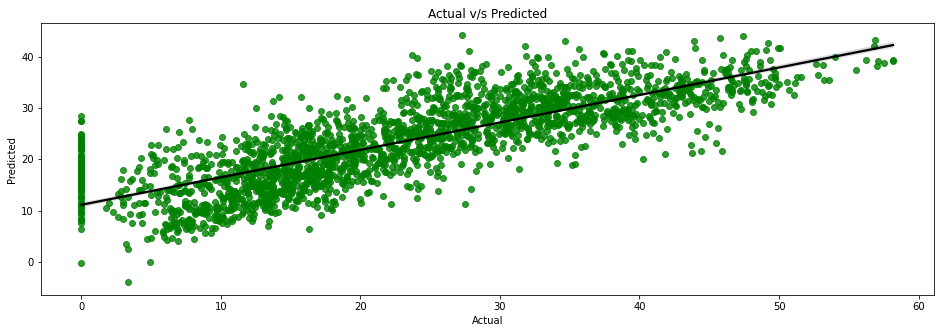

In [460]:
'''Plotting for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_en,scatter_kws={'color':'green'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

#**Cross validation on Lasso Regression**

In [461]:
#Let's do a cross validation on Lasso regression
lasso_reg_cv=Lasso()

#alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_reg_cv, alphas, scoring='neg_mean_squared_error', cv=5)
#Fitting Into model
lasso_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [462]:
#Since it showing best parameter of alpha, means it will be as linear regression.
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squared error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.001}
The best negative mean squared error value is -35.510289758082834


#**Cross Validation on Ridge Regression**

In [463]:
#Let's do a cross validation on Ridge regression
ridge_reg=Ridge()

#alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=5)
#Fitting Into model
ridge_linear_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [464]:
#Since it showing best parameter of alpha, means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squared error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squared error value is -35.51107232608038


#**Cross Validation on Elastic Net Regression**

In [465]:
#Let's do a cross validation on Elastic Net Regression 
elasticnet_reg = ElasticNet()
alphas_l1 = {'alpha' : [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio' : [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elasticnet_linear_reg = GridSearchCV(elasticnet_reg, alphas_l1, scoring = 'neg_mean_squared_error', cv=5)
#fitting into the model
elasticnet_linear_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [466]:
print(f'The best alpha value is {elasticnet_linear_reg.best_params_}')
print(f'The best negative mean squared error value is {elasticnet_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.001, 'l1_ratio': 0.9}
The best negative mean squared error value is -35.509755331216766


#**Decision Tree Regressor**

In [467]:
from sklearn.tree import DecisionTreeRegressor
#Implementation of Decision tree regressor
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=9, max_leaf_nodes=100, max_features=9, random_state = 2)

In [468]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=9,
                      max_leaf_nodes=100, random_state=2)

In [469]:
dt_regressor.score(X_train, y_train)


0.7209874759571002

In [470]:
dt_regressor.score(X_test, y_test)

0.6739706314353562

In [471]:
#Get the X_train and X-test value
y_pred_train_dt = dt_regressor.predict(X_train)
y_pred_test_dt = dt_regressor.predict(X_test)

In [472]:
#Checking the Model score
print("Model Score:",dt_regressor.score(X_train,y_train))

#Calculate Mean Square Error
MSE_for_dt =  mean_squared_error(y_train, y_pred_train_dt)
print('Mean_Squared_Error_for_Decision_tree_Regression : ',MSE_for_dt)

#Calculate Mean Absolute error
MAE_for_dt = mean_absolute_error(y_train, y_pred_train_dt)
print('Mean_Absolute_Error_for_Decision_tree_Regression :' , MAE_for_dt)

#Calculate Root Mean Square Error
RMSE_for_dt = np.sqrt(MSE_for_dt)
print('Root_Mean_Square_Error_For_Decision_tree_Regression :', RMSE_for_dt)

#Calculate r2 Score
r2_score_for_dt = r2_score(y_train, y_pred_train_dt)
print('r2_score_for_Decision_tree :', r2_score_for_dt)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_dt = (1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Decision_tree :", Adjusted_r2_score_for_dt )

Model Score: 0.7209874759571002
Mean_Squared_Error_for_Decision_tree_Regression :  42.965327970735366
Mean_Absolute_Error_for_Decision_tree_Regression : 4.814614360337979
Root_Mean_Square_Error_For_Decision_tree_Regression : 6.5547942737156415
r2_score_for_Decision_tree : 0.7209874759571002
Adjusted_r2_score_for_Decision_tree : 0.7140644123923654


**Looks like our r2 score value is 0.69 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [473]:
#Storing the traning set metrics value in a dataframe for later comparison
train_dict = {'Model' : 'Decision Tree Regression',
         'MAE' : round((MAE_for_dt),3),
         'MSE' : round((MSE_for_dt),3),
         'RMSE' : round((RMSE_for_dt),3),
         'R2_score' : round((r2_score_for_dt),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_dt),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)


In [474]:
#Checking the Model score
print("Model Score:",dt_regressor.score(X_test,y_test))

#Calculate Mean Square Error
MSE_for_dt =  mean_squared_error(y_test, y_pred_test_dt)
print('Mean_Squared_Error_for_Decision_tree_Regression : ',MSE_for_dt)

#Calculate Mean Absolute error
MAE_for_dt = mean_absolute_error(y_test, y_pred_test_dt)
print('Mean_Absolute_Error_for_Decision_tree_Regression :' , MAE_for_dt)

#Calculate Root Mean Square Error
RMSE_for_dt = np.sqrt(MSE_for_dt)
print('Root_Mean_Square_Error_For_Decision_tree_Regression :', RMSE_for_dt)

#Calculate r2 Score
r2_score_for_dt = r2_score(y_test, y_pred_test_dt)
print('r2_score_for_Decision_tree :', r2_score_for_dt)

#Calculate Adjusted r2 Score
Adjusted_r2_score_for_dt = (1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Decision_tree :", Adjusted_r2_score_for_dt )

Model Score: 0.6739706314353562
Mean_Squared_Error_for_Decision_tree_Regression :  51.501686737011866
Mean_Absolute_Error_for_Decision_tree_Regression : 5.061041305092061
Root_Mean_Square_Error_For_Decision_tree_Regression : 7.176467566777673
r2_score_for_Decision_tree : 0.6739706314353562
Adjusted_r2_score_for_Decision_tree : 0.6658809514101098


**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [475]:
test_dict = {'Model' : 'Decision Tree Regression',
         'MAE' : round((MAE_for_dt),3),
         'MSE' : round((MSE_for_dt),3),
         'RMSE' : round((RMSE_for_dt),3),
         'R2_score' : round((r2_score_for_dt),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_dt),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)

Text(0.5, 1.0, 'Actual v/s Predicted')

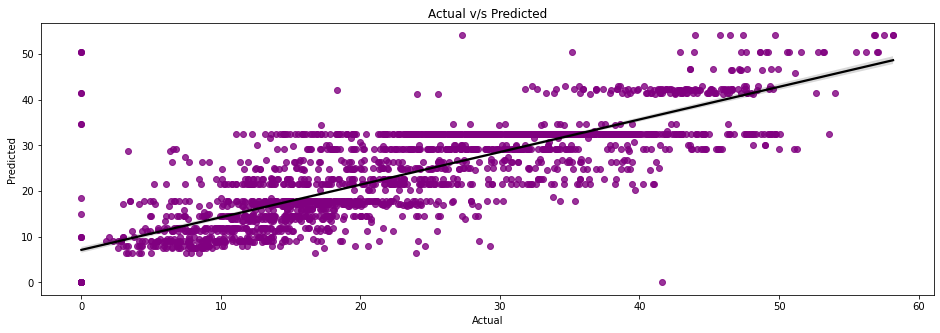

In [476]:
'''Plotting for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_dt,scatter_kws={'color':'purple'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

##Random Forest

In [477]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [478]:
rf_model.score(X_train,y_train)

0.9899883273068365

In [479]:
rf_model.score(X_test,y_test)

0.9226012729258193

In [480]:

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [481]:
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )

Model Score: 0.9899883273068365
MSE : 1.5417042739317617
RMSE : 1.2416538462598026
MAE : 0.7871866050476132
R2 : 0.9899883273068365
Adjusted R2 : 0.9897399103345811


**Looks like our r2 score value is 0.99 that means our model is  able to 
capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [482]:
train_dict = {'Model' : 'Random Forest Regression',
         'MAE' : round((MAE_rf),3),
         'MSE' : round((MSE_rf),3),
         'RMSE' : round((RMSE_rf),3),
         'R2_score' : round((r2_rf),3),
         'Adjusted_R2' : round((Adjusted_R2_rf),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)

In [483]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )

MSE : 12.226398539392852
RMSE : 3.496626737213003
MAE : 2.1481407345176153
R2 : 0.9226012729258193
Adjusted R2 : 0.9206807988926116


**Looks like our r2 score value is 0.92 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [484]:
test_dict = {'Model' : 'Random Forest Regression',
         'MAE' : round((MAE_rf),3),
         'MSE' : round((MSE_rf),3),
         'RMSE' : round((RMSE_rf),3),
         'R2_score' : round((r2_rf),3),
         'Adjusted_R2' : round((Adjusted_R2_rf),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)

Text(0.5, 1.0, 'Actual v/s Predicted')

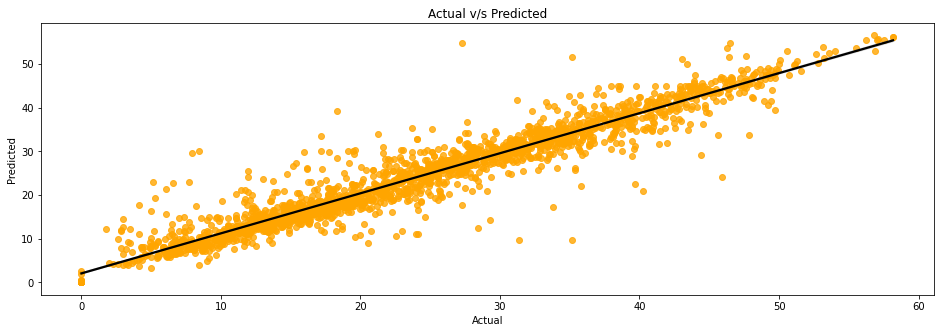

In [485]:
'''Plotting for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_r,scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

In [486]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
#importances
#indices

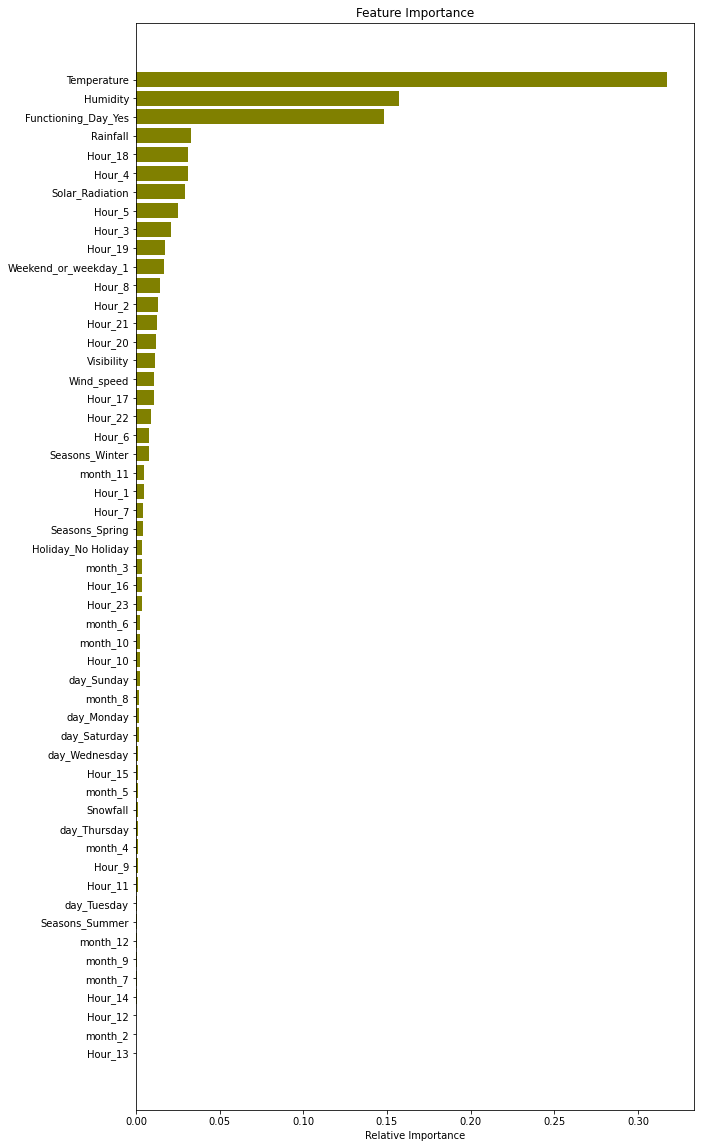

In [487]:
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='olive', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##**Gradient Boosting** 

In [488]:
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [489]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [490]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_gb )

Model Score: 0.8782317812846866
MSE : 18.75117065609305
RMSE : 4.330262192534425
MAE : 3.2804943475099066
R2 : 0.8782317812846866
Adjusted R2 : 0.8752103788540164


**Looks like our r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [491]:
train_dict = {'Model' : 'Gradient Boosting',
         'MAE' : round((MAE_gb),3),
         'MSE' : round((MSE_gb),3),
         'RMSE' : round((RMSE_gb),3),
         'R2_score' : round((r2_gb),3),
         'Adjusted_R2' : round((Adjusted_R2_gb),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)

In [492]:
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :", Adjusted_R2_gb )

MSE : 21.211504736790943
RMSE : 4.605594938419025
MAE : 3.4771865918382234
R2 : 0.8657214174177328
Adjusted R2 : 0.8623895986551579


**Looks like our r2 score value is 0.86 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [493]:
test_dict = {'Model' : 'Gradient Boosting',
         'MAE' : round((MAE_gb),3),
         'MSE' : round((MSE_gb),3),
         'RMSE' : round((RMSE_gb),3),
         'R2_score' : round((r2_gb),3),
         'Adjusted_R2' : round((Adjusted_R2_gb),3)
         }
test_df = test_df.append(train_dict, ignore_index=True)

Text(0.5, 1.0, 'Actual v/s Predicted')

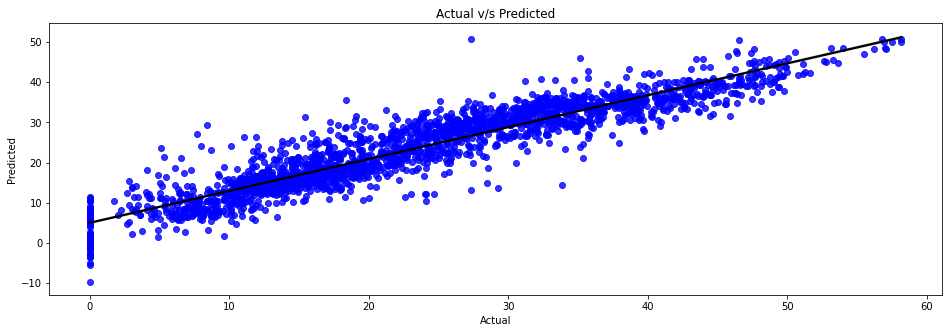

In [494]:
'''Plotting for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_g,scatter_kws={'color':'blue'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

In [495]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

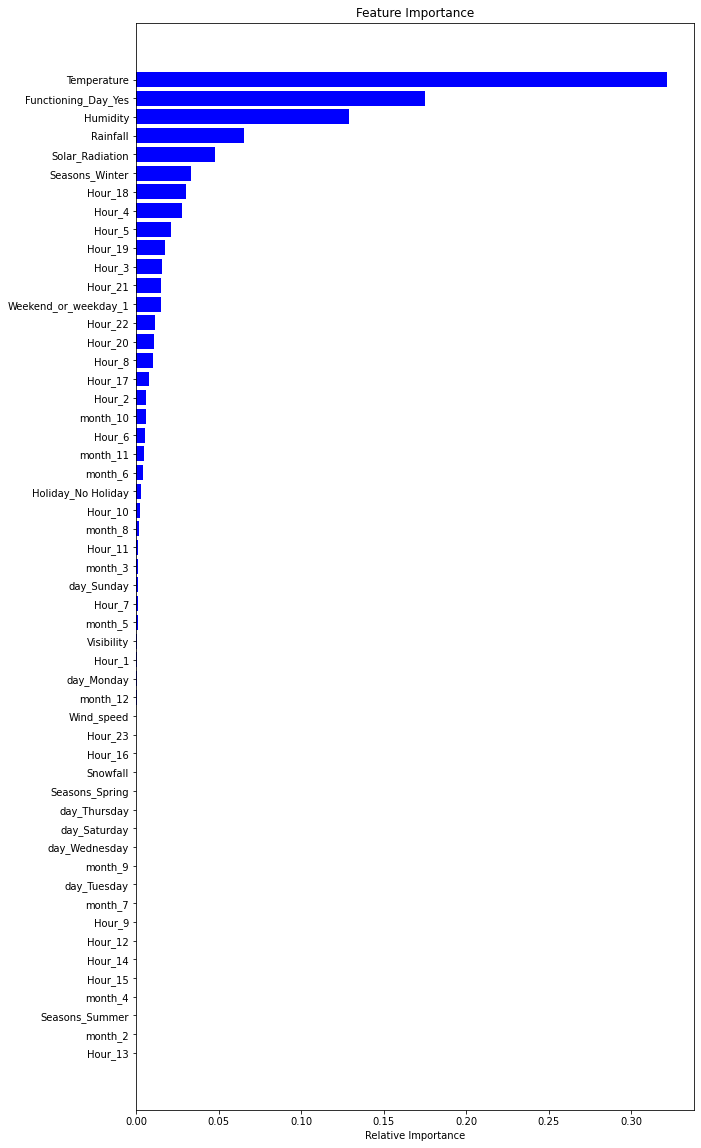

In [496]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter Tuning**


Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [497]:
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [498]:
#Create an instance for Gradient boosting regressor
gb_reg = GradientBoostingRegressor()
gb_grid = GridSearchCV(estimator=gb_reg, param_grid= param_dict, cv=5, verbose=2)
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [499]:
#Check the best estimator
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [500]:
#Let's train the optimal model
gb_reg_optimal = gb_grid.best_estimator_
gb_reg_optimal.score(X_train, y_train)

0.9507005314006124

In [501]:
#Check the score
gb_reg_optimal.score(X_test, y_test)

0.9232745902371369

In [502]:
#Get the X_tarin and X_test value
y_pred_test_gb_optimal = gb_reg_optimal.predict(X_test)
y_pred_train_gb_optimal = gb_reg_optimal.predict(X_train)

In [503]:
#Checking the Model score
print("Model Score:",gb_reg_optimal.score(X_train,y_train))
#Calculate Mean Square Error
MSE_for_gb_reg_optimal =  mean_squared_error(y_train, y_pred_train_gb_optimal)
print('Mean_Squared_Error_for_Gradient_Boosting_optimal : ',MSE_for_gb_reg_optimal)
#Calculate Mean Absolute error
MAE_for_gb_reg_optimal = mean_absolute_error(y_train, y_pred_train_gb_optimal)
print('Mean_Absolute_Error_for_Gradient_Boosting_optimal :' , MAE_for_gb_reg_optimal)
#Calculate Root Mean Square Error
RMSE_for_gb_reg_optimal = np.sqrt(MSE_for_gb_reg_optimal)
print('Root_Mean_Square_Error_For_Gradient_Boosting_optimal :', RMSE_for_gb_reg_optimal)
#Calculate r2 Score
r2_score_for_gb_reg_optimal = r2_score(y_train, y_pred_train_gb_optimal)
print('r2_score_for_Gradient_Boosting_optimal :', r2_score_for_gb_reg_optimal)
#Calculate Adjusted r2 Score
Adjusted_r2_score_for_gb_reg_optimal = (1-(1-r2_score(y_train, y_pred_train_gb_optimal))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Gradient_Boosting_optimal :", Adjusted_r2_score_for_gb_reg_optimal )

Model Score: 0.9507005314006124
Mean_Squared_Error_for_Gradient_Boosting_optimal :  7.591658634040303
Mean_Absolute_Error_for_Gradient_Boosting_optimal : 1.8645346510320218
Root_Mean_Square_Error_For_Gradient_Boosting_optimal : 2.7552964693550317
r2_score_for_Gradient_Boosting_optimal : 0.9507005314006124
Adjusted_r2_score_for_Gradient_Boosting_optimal : 0.9494772767958524


**Our r2 score value is 0.95 that means our model is  able to capture most of the data variance. Lets save it in a dataframe.**

In [504]:
train_dict = {'Model' : 'Gradient Boosting GridSearchCV',
         'MAE' : round((MAE_for_gb_reg_optimal),3),
         'MSE' : round((MSE_for_gb_reg_optimal),3),
         'RMSE' : round((RMSE_for_gb_reg_optimal),3),
         'R2_score' : round((r2_score_for_gb_reg_optimal),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_gb_reg_optimal),3)
         }
training_df = training_df.append(train_dict, ignore_index=True)

In [505]:
#Checking the Model score
print("Model Score:",gb_reg_optimal.score(X_test,y_test))
#Calculate Mean Square Error
MSE_for_gb_reg_optimal =  mean_squared_error(y_test, y_pred_test_gb_optimal)
print('Mean_Squared_Error_for_Gradient_Boosting_optimal : ',MSE_for_gb_reg_optimal)
#Calculate Mean Absolute error
MAE_for_gb_reg_optimal = mean_absolute_error(y_test, y_pred_test_gb_optimal)
print('Mean_Absolute_Error_for_Gradient_Boosting_optimal :' , MAE_for_gb_reg_optimal)
#Calculate Root Mean Square Error
RMSE_for_gb_reg_optimal = np.sqrt(MSE_for_gb_reg_optimal)
print('Root_Mean_Square_Error_For_Gradient_Boosting_optimal :', RMSE_for_gb_reg_optimal)
#Calculate r2 Score
r2_score_for_gb_reg_optimal = r2_score(y_test, y_pred_test_gb_optimal)
print('r2_score_for_Gradient_Boosting_optimal :', r2_score_for_gb_reg_optimal)
#Calculate Adjusted r2 Score
Adjusted_r2_score_for_gb_reg_optimal = (1-(1-r2_score(y_test, y_pred_test_gb_optimal))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted_r2_score_for_Gradient_Boosting_optimal :", Adjusted_r2_score_for_gb_reg_optimal )

Model Score: 0.9232745902371369
Mean_Squared_Error_for_Gradient_Boosting_optimal :  12.120037025414051
Mean_Absolute_Error_for_Gradient_Boosting_optimal : 2.374481210021377
Root_Mean_Square_Error_For_Gradient_Boosting_optimal : 3.4813843547379326
r2_score_for_Gradient_Boosting_optimal : 0.9232745902371369
Adjusted_r2_score_for_Gradient_Boosting_optimal : 0.921370823047328


**Our r2 score value is 0.92 that means our model is  able to capture most of the data variance. Lets save it in a dataframe.**

In [506]:
test_dict = {'Model' : 'Gradient Boosting GridSearchCV',
         'MAE' : round((MAE_for_gb_reg_optimal),3),
         'MSE' : round((MSE_for_gb_reg_optimal),3),
         'RMSE' : round((RMSE_for_gb_reg_optimal),3),
         'R2_score' : round((r2_score_for_gb_reg_optimal),3),
         'Adjusted_R2' : round((Adjusted_r2_score_for_gb_reg_optimal),3)
         }
test_df = test_df.append(test_dict, ignore_index=True)

Text(0.5, 1.0, 'Actual v/s Predicted')

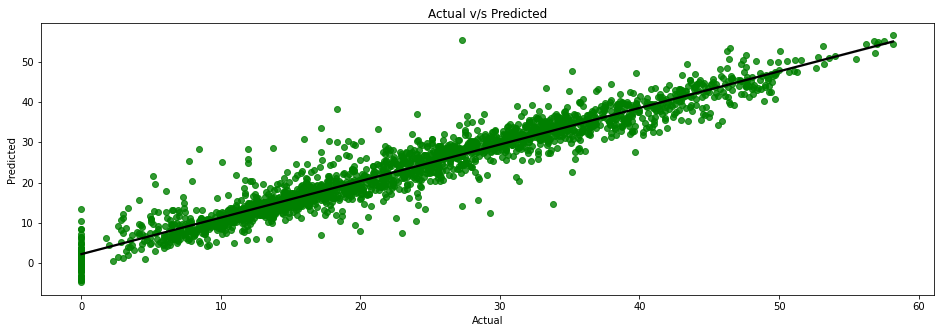

In [507]:
'''Plot scatter plot for y_pred_test values and 
y_test values. To check how close we are to regresson line'''
plt.figure(figsize=(16,5))
sns.regplot(x=y_test,y=y_pred_test_gb_optimal,scatter_kws={'color':'g'},line_kws={'color':'black'})
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title("Actual v/s Predicted")

Text(0.5, 0, 'Relative Importance')

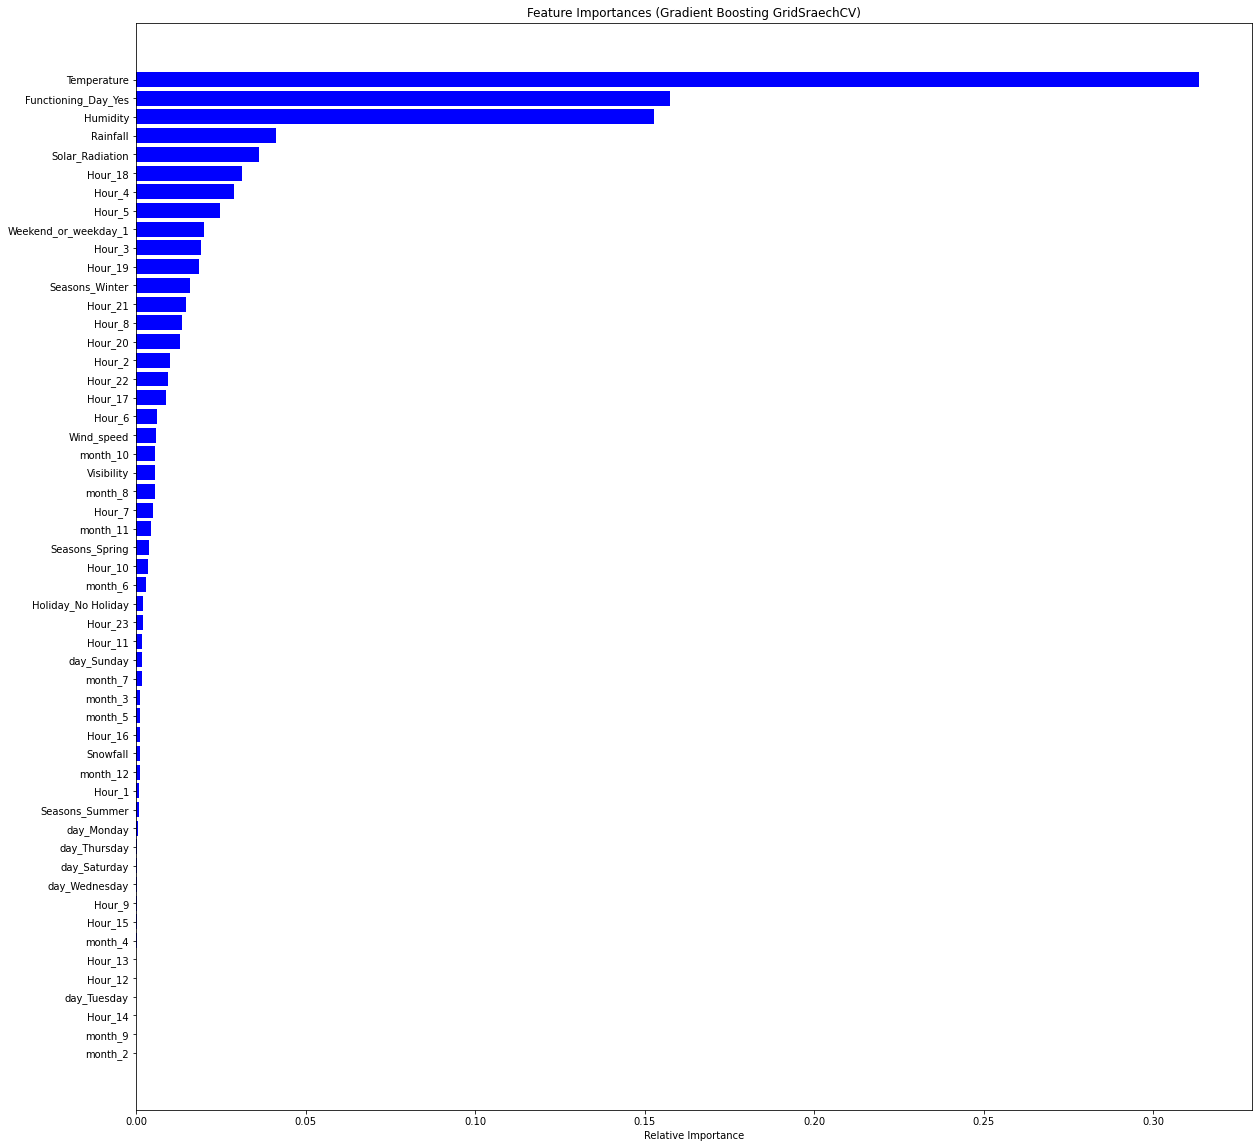

In [508]:
#Let's check the important variables
imp_variables=X.columns
importances = gb_reg_optimal.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,20))
plt.title('Feature Importances (Gradient Boosting GridSraechCV)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

In [509]:
importances = gb_reg_optimal.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)


In [510]:
#Looking at different values 
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
34,Functioning_Day_Yes,0.16
1,Humidity,0.15
4,Solar_Radiation,0.04
5,Rainfall,0.04
10,Hour_4,0.03
24,Hour_18,0.03
32,Seasons_Winter,0.02
25,Hour_19,0.02
11,Hour_5,0.02


#**Conclusion**

* **We initially performed EDA on each feature of our datset during the course of our investigation. First, we converted and examined our dependent variable, "Rented Bike Count."**

* **Next, we looked at categorical variables and eliminated those that were dominated by a single class. We also looked at numerical variables and determined their correlation, distribution, and link to the dependent variable.** 

* **Additionally, we hot encoded the categorical variables and deleted several numerical characteristics with a large percentage of 0 values. The following step involved the implementation of seven machine learning algorithms: Linear Regression, Lasso Regression, Ridge Regression, Elasticnet Regression, Decission tree, Random Forest, and XGBoost (Gradient Boosting).**

In [511]:
#Displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0              Linear regression   4.446  34.773  5.897   
             1               Lasso regression   4.456  34.905  5.908   
             2                Ridge regression  4.447  34.774  5.897   
             3          Elastic net Regression  5.777  57.409  7.577   
             4        Decision Tree Regression  4.815  42.965  6.555   
             5        Random Forest Regression  0.787   1.542  1.242   
             6               Gradient Boosting  3.280  18.751  4.330   
             7  Gradient Boosting GridSearchCV  1.865   7.592  2.755   
Test set     0              Linear regression   4.385  33.018  5.746   
             1               Lasso regression   4.400  33.130  5.756   
             2                Ridge regression  4.387  33.033  5.747   
             3          Elastic net Regression  5.777  57.409  7.577   
             4        Decision Tree Regression  5.061  51.502  7.176   
             5        Random Forest Regression  2.148  12.226  3.497   
             6               Gradient Boosting  3.280  18.751  4.330   
             7  Gradient Boosting GridSearchCV  2.374  12.120  3.481   

                R2_score  Adjusted_R2  
Training set 0     0.774        0.770  
             1     0.773        0.770  
             2     0.774        0.770  
             3     0.627        0.618  
             4     0.721        0.714  
             5     0.990        0.990  
             6     0.878        0.875  
             7     0.951        0.949  
Test set     0     0.791        0.790  
             1     0.790        0.790  
             2     0.791        0.790  
             3     0.627        0.618  
             4     0.674        0.666  
             5     0.923        0.921  
             6     0.878        0.875  
             7     0.923        0.921

* **Without hyperparameter adjustment, we obtained a r2 score of 99% on the training set and 92% on the test set for the Random Forest regressor model. Without hyperparameter adjustment, our model functioned satisfactorily.**

* **Without hyperparameter tweaking, we obtained r2 scores for the Gradient Boosting model of 87% on training data and 85% on test data. After hyperparameter tuning, we obtained r2 scores of 95% on training data and 92% on test data, improving the model's performance.**

* **As a result, the Random forest Regressor and Gradient Boosting Regression (GridSearchCV) produce good r2 values.**
 
* **We are able to use these models.Temperature and Hours play a significant impact in models in terms of features.**

**However, this is not the ultimate result. Since this data is time-dependent, the values for variables like temperature, wind speed, sun radiation, etc., will not always be constant. There will therefore be instances where the model may not perform as expected. Machine learning is a rapidly evolving field, thus we must be prepared for any situation and regularly assess our model. As a result, maintaining up to date with the always expanding field of machine learning and obtaining superior knowledge would surely enable one to stay ahead in the future.**